<a href="https://colab.research.google.com/github/LALITH23SUNDARAM/Topic-Modelling-on-News-Article/blob/main/Lalith_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Topic Modelling:**

Are you really wondering what is and where Topic extraction are being used? Before getting answer to above question, lets yourself response to following questions.  

*   what Indian people talking about their goverment over twitter for last decade?

*  How different news channels potrait news about covid for last two years?


*   Whats are the discussions carried out in Last three years NIPS Conference? 


  To perform these tasks, we can manually gothrough some popular twitter tweets, read popular news channel articles one by one to know about how they capture during pandemic period or read the post confrence NIPS scripts. 
  This the way we able to extract, what's all talk about.
  But do you think this is the efficient step to do. Its consumes heavy period and may not produce results as we expected.

  Then, How could we do this task? 

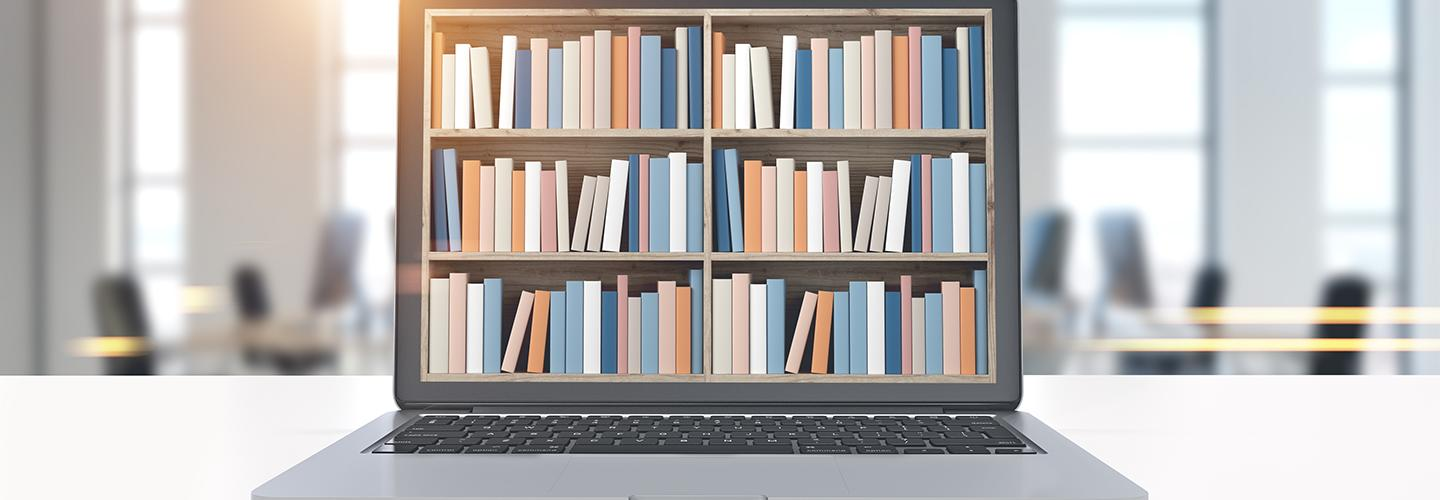


  
  Lets have a drill..!
   
   “There’s a huge status quo bias, and it’s killing people,” says Alex Tabarrok, an economist at George Mason University in Fairfax, Virginia. “Had we done this starting in January, we could have vaccinated tens, perhaps hundreds, of millions more people.”

   The above lines talks about pepole vaccination in virginia. we humans without gothrough the entire sentence we can come up this is about this. Our brain just captures the keywords and grabs the subject. Here the key words are 

   “There’s a huge status quo bias, and it’s killing people,” says Alex Tabarrok, an economist at George Mason University in Fairfax, **Virginia**. “Had we done this starting in January, we could have **vaccinated** tens, perhaps hundreds, of millions more **people**.” 
 
 
  The same task, we asking machines to carry out. This process of extracting theme or subject from the huge documents is known as **"Topic modelling or Topic Extracting"**


  Then, How machine could understand the importance of words in a sentence?
   Yes, machines not do well with texts documents. We have to pretreat our input as machine can understood. **This project is all about what are the preprocessing steps, how to implement differnent tools to acheive what we care about.**


 







# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [ ]:
# for framework
import pandas as pd
# for linear algeberic operations
import numpy as np

# for visualization
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# locate directories
import glob
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Raw Data:**

Source data contains multiple csv files, each article stored individually. And article we got from British Broadcasting Company(BBC) where each article is labeled under Five categories.

*   Business
*   Entertainment

*   Politics
*   Sports

*   Technology
 
We extracting multiple files one by one and aggregates in dataframe for better exploration.







In [ ]:
# Base directory
base_dir = "/content/drive/MyDrive/Topic Modelling BBC"

# retreiving business article paths recursively from base directories
business_file_list = glob.glob(os.path.join(os.getcwd(), base_dir, "business", "*.txt"))

# retreiving entertainment article paths recursively from base directories
entertainment_file_list = glob.glob(os.path.join(os.getcwd(), base_dir, "entertainment", "*.txt"))

# retreiving politics article paths recursively from base directories
politics_file_list = glob.glob(os.path.join(os.getcwd(), base_dir, "politics", "*.txt"))

# retreiving sport article paths recursively from base directories
sport_file_list = glob.glob(os.path.join(os.getcwd(), base_dir, "sport", "*.txt"))

# retreiving technology article paths recursively from  base directories
tech_file_list = glob.glob(os.path.join(os.getcwd(), base_dir, "tech", "*.txt"))

Next, we have to handle the files. We are using open function along with read mode over each directories and stored in list object. Dataframe created from the stored list.

In [ ]:
# To store labels
labels = []

# to store articles
corpus = []

# open and read file
for file_list in [
    business_file_list, entertainment_file_list, politics_file_list, sport_file_list, tech_file_list
]:
    for file_path in file_list:
        with open(file_path, encoding="utf8", errors='ignore') as f_input:
            corpus.append((f_input.read()))
            labels.append(file_path.split('/')[-2])

In [ ]:
# convert to dataframe
df = pd.DataFrame({'col':corpus,'Topics':labels})

**Head:**

---



 

*   Article labelled at prehand, it helps to eyeball model extracted theme is related or not.
*   Then goal of every topic modelling is to extract underlying information from the article not to classify or segmenting the articles.



In [ ]:
df.head()

,col,Topics
0,Yukos unit buyer faces loan claim\n\nThe owner...,business
1,Ad sales boost Time Warner profit\n\nQuarterly...,business
2,Dollar gains on Greenspan speech\n\nThe dollar...,business
3,US trade gap hits record in 2004\n\nThe gap be...,business
4,High fuel prices hit BA's profits\n\nBritish A...,business


**Corpus Summary:**

In [ ]:
# group the articles by its labels 
categories = df.groupby('Topics').agg({'col':'count'})
categories.to_excel("output.xlsx") 
categories

,col
Topics,
business,510
entertainment,386
politics,417
sport,511
tech,401


Corpus contains 2225 articles under Five labels as tabled above. Maximum numbers of articles are in "Business" & "sport" followed by "Politics", "Technology" and "Entertainment".


**Exploration:**

In [ ]:
# renaming column name
df.rename(columns={'col':'article_content'},inplace=True)

In [ ]:
from nltk.tokenize import RegexpTokenizer

Create function length to determine number of words in document. instead of Python in-built function, it measures number of characters in document. 

In [ ]:
def length(sub):

  ''''
  function returns number of words 
  '''
  # split the documents with defined delimiter
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")
  
  # count the words
  length_ = len(tokenizer.tokenize(sub))


  return length_

**Vocabulary Size Distribution:**

In [ ]:
# added new column contains length of article
df['length_article'] = df['article_content'].apply(length)
df.describe()

,length_article
count,2225.000000
mean,430.049438
std,265.964335
min,96.000000
25%,275.000000
50%,371.000000
75%,526.000000
max,4946.000000


In [ ]:
corpus_df = df.copy(deep=True)

In [ ]:
corpus_df.head()

,article_content,Topics,length_article
0,Yukos unit buyer faces loan claim\n\nThe owner...,business,291
1,Ad sales boost Time Warner profit\n\nQuarterly...,business,489
2,Dollar gains on Greenspan speech\n\nThe dollar...,business,428
3,US trade gap hits record in 2004\n\nThe gap be...,business,375
4,High fuel prices hit BA's profits\n\nBritish A...,business,463


In [ ]:
# total number of texts in corpus
number_words_in_corpus = corpus_df['length_article'].sum()
print(f'Total number of words in the corpus {number_words_in_corpus}')

Total number of words in the corpus 956860


Algorithms which used for topic modelling will require huge words to understand and extract the meaningfull themes. Thankfully our corpus contains enough texts. 

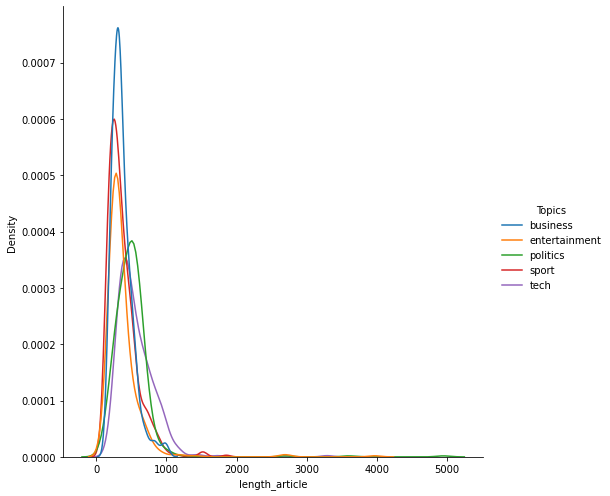

In [ ]:
# stacked dist plot
sns.displot(corpus_df, x="length_article", hue="Topics", kind="kde",height=7,aspect =1 )


Most of the article contains texts ranges between 500 to 1000. And some extends upto 5000. Lets explore how words distributed within the each article categgories.

**Distribution of Article Length across segment:**

**Business:**

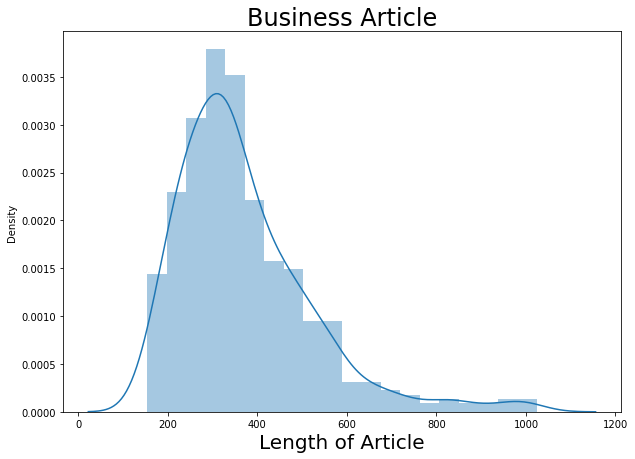

In [ ]:
business_df = corpus_df[corpus_df['Topics']=='business']
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
sns.distplot(x=business_df["length_article"])
ax.set_xlabel( "Length of Article" , size = 20 )
ax.set_title( 'Business Article' , size = 24 )
fig.savefig('Length2.png')

**Entertainment:**

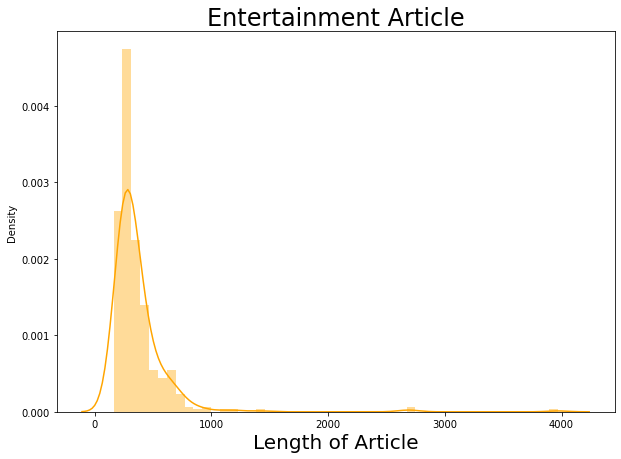

In [ ]:
entertainment_df = corpus_df[corpus_df['Topics']=='entertainment']
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
sns.distplot(x=entertainment_df["length_article"],color = 'orange')
ax.set_xlabel( "Length of Article" , size = 20 )
ax.set_title( 'Entertainment Article' , size = 24 )
fig.savefig('Length3.png')

**Politics:**

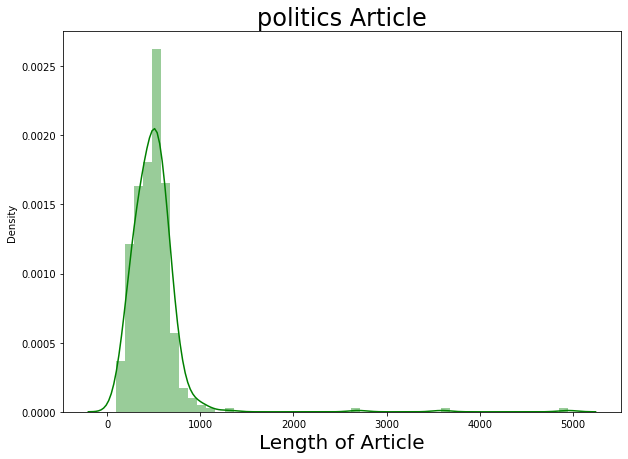

In [ ]:
politics_df = corpus_df[corpus_df['Topics']=='politics']
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
sns.distplot(x=politics_df["length_article"],color = 'green')
ax.set_xlabel( "Length of Article" , size = 20 )
ax.set_title( 'politics Article' , size = 24 )
fig.savefig('Length4.png')

**Sports:**

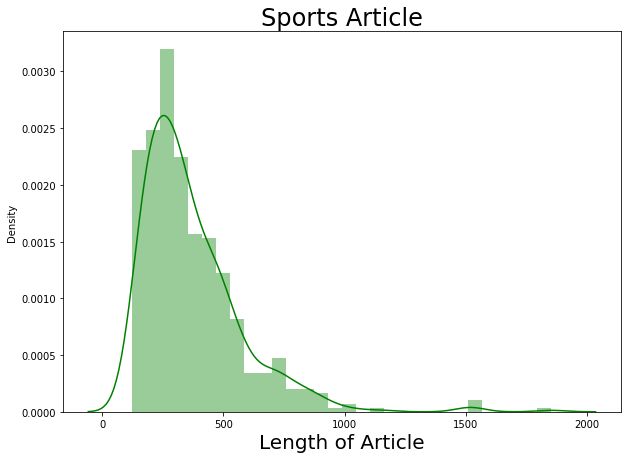

In [ ]:
sport_df = corpus_df[corpus_df['Topics']=='sport']
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
sns.distplot(x=sport_df["length_article"],color = 'green')
ax.set_xlabel( "Length of Article" , size = 20 )
ax.set_title( 'Sports Article' , size = 24 )
fig.savefig('Length5.png')

**Technology:**

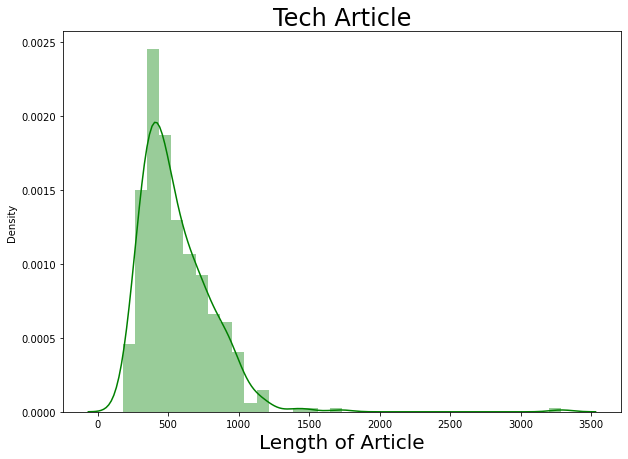

In [ ]:
tech_df = corpus_df[corpus_df['Topics']=='tech']
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
sns.distplot(x=tech_df["length_article"],color = 'green')
ax.set_xlabel( "Length of Article" , size = 20 )
ax.set_title( 'Tech Article' , size = 24 )
fig.savefig('Length5.png')

Have of glance on particular article in politics.

In [ ]:
print(corpus_df['article_content'][1283])

Blunkett hints at election call

Ex-Home Secretary David Blunkett has given fresh clues that the general election will be announced on Monday.

He told BBC Radio Five Live: "I'm out in my constituency getting ready for what we presume will be an announcement very shortly at the weekend." He clarified that he meant he would be in his Sheffield seat this weekend, not that he expected an election call then. Tony Blair is tipped to ask the Queen on Monday to dissolve Parliament ready for a 5 May poll.



Article contains white space, puntuations and some connecting words even if remove those words will not much affects the article context.

Removing these punctutions and connecting words will affect the sementic context but in topic modelling we taking more care over keywords.

Lets, keep eye over this article how its changing during individual processing steps.

**Data Preprocessing:**

*   Into lower case.


*   Remove Numericals.



*   Remove Punctuations any symbols and special characters.
*   Remove stopwords.

*   Lemmatize inflated words.







**Lower case:**
Initial steps to create global unique charcters.

In [ ]:
# function lowers the characters
def lowercase(strings_):
  return strings_.lower()

In [ ]:
# applying function to article column
corpus_df['article_content'] = corpus_df['article_content'].apply(lowercase)

In [ ]:
print(corpus_df['article_content'][1283])

blunkett hints at election call

ex-home secretary david blunkett has given fresh clues that the general election will be announced on monday.

he told bbc radio five live: "i'm out in my constituency getting ready for what we presume will be an announcement very shortly at the weekend." he clarified that he meant he would be in his sheffield seat this weekend, not that he expected an election call then. tony blair is tipped to ask the queen on monday to dissolve parliament ready for a 5 may poll.



**Remove Punctuations:**


NLTK - Natural Language Tool Kit, is one of the library is widely used for text preprocessing. This library contains inbuilt common english language Punctuation list. We can subract punctuations from our corpus using this library.

In [ ]:
# importing natural language tool kit
import nltk
import string

In [ ]:
default_punctuations = [punc for punc in string.punctuation]
print(len(default_punctuations))
print(default_punctuations)

32
['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


Library contains 32 puncuation marks.

**Tokenization:**

  Tokenization is an important step in natural laanguage processing here we tokenize sentence into individual words. Is a way of separating a whole sentence into smaller units called tokens.

In [ ]:
def remove_punctuations(sub):

  # punctuations list from nltk library
  default_punctuations = [punc for punc in string.punctuation]

  # create tokenizer instance with different delimiters
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")

  # list to store tokens
  non_stop_msg = []

  # tokens to final string of tokens
  final_str = ' '

  # loop through tokens
  for char in tokenizer.tokenize(sub):

    # conditionl statement 
    if char not in default_punctuations:
      non_stop_msg.append(char)

  return final_str.join(non_stop_msg)


In [ ]:
# applying functions
corpus_df['article_content'] = corpus_df['article_content'].apply(remove_punctuations)

In [ ]:
# checking the lengths for each process
corpus_df['after_rem_punc_length'] = corpus_df['article_content'].apply(length)

In [ ]:
print(corpus_df['article_content'][1283])

blunkett hints at election call ex -home secretary david blunkett has given fresh clues that the general election will be announced on monday he told bbc radio five live "i'm out in my constituency getting ready for what we presume will be an announcement very shortly at the weekend ." he clarified that he meant he would be in his sheffield seat this weekend not that he expected an election call then tony blair is tipped to ask the queen on monday to dissolve parliament ready for a 5 may poll


Take a look, white space between the lines are removed from the article. And length of the articles reduced substantially. 

Every topic modelling faces the curse of Dimensionality since its uses tokens as a features, its good to rid non contexual words from the corpus and eventually reduces dimensionality.

In [ ]:
corpus_df.head()

,article_content,Topics,length_article,after_rem_punc_length
0,yukos unit buyer faces loan claim the owners o...,business,291,275
1,ad sales boost time warner profit quarterly pr...,business,489,447
2,dollar gains on greenspan speech the dollar ha...,business,428,396
3,us trade gap hits record in 2004 the gap betwe...,business,375,345
4,high fuel prices hit ba 's profits british air...,business,463,426


**Unigram:**

Is considering sequence of one word. Generally metioned as n-gram. If we considering two word sequence its known as bi-gram. Similarly for three consecutive words its tri-gram.

**Top 20 words in corpus:**

Considering uni-gram sequence, lets check the top 20 words in the corpus.

**CountVectoriser:** Count vectorizer creates Bag of words(BoW). BoW is unique words among the corpus. Countvector simply a dictionary with each key set to a word and corresponding value sets to frequency of word appears in a Document.

In following context we are using the term Document to represent the individual article and corpus as entire set of documents.


In [ ]:
# import countvectoriser
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:

def get_top_n_words(corpus_df, n=None):

    ''' 
    This functions takes entire corpus and returns list of tuple in  pair words and number of its occurence.
    '''
    # creates instance of count vectorizer
    vec = CountVectorizer()

    # returns sparse matrix of index as documents and columns as Bow
    bag_of_words = vec.fit_transform(corpus_df['article_content'])

    # returns 2D array with count of features in corpus
    sum_words = bag_of_words.sum(axis=0) 

    # returns list of tuples with text,counts pair
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # sort the list of tuples by its number of occurence
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    # returns list of tuples top n words
    return words_freq[:n]

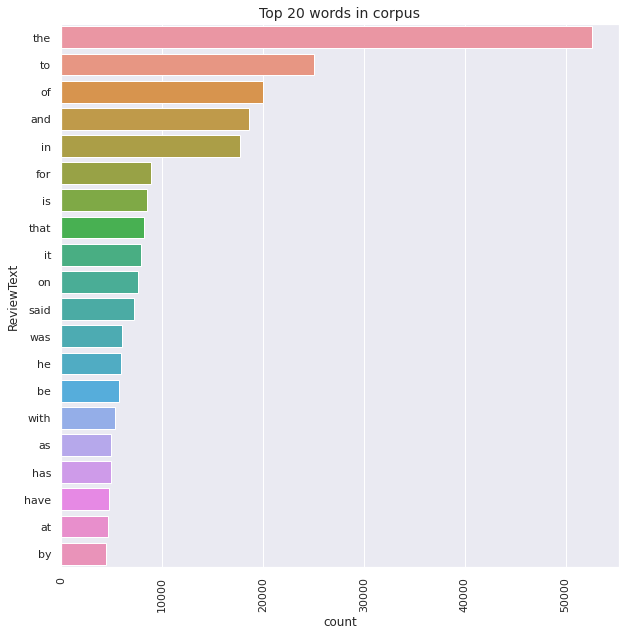

In [ ]:
# Apply function over the corpus
common_words = get_top_n_words(corpus_df, n = 20)

# creating dataframe from list of tuples
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

# plot for visualization
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.set(font_scale = 1)
sns.barplot(y='ReviewText', x='count', data=df1)
ax.set_title( "Top 20 words in corpus" , size = 14 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('top_n_words.png')

These are top more frequently  occuring tokens over the corpus. These are the connecting words just helps to complete the sentence but not contributing any context. These words are known as **"stopwords"**. we can rid off those words.

So, our next step is to remove these words and check what are the frequently occuring words other than stopwords.

**Removing stopwords:**

NLTK has default list of stopwords we are using those. But stopwords are domain specific. We customize our own stopwords if we had prior domain understanding. Let here go on with defaults.

In [ ]:
# import nltk stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
import string
from nltk.corpus import stopwords

In [ ]:
# some stopwords
print(stopwords.words('english')[:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [ ]:
def removing_stopwords(sub):

  '''
  functions takes string and return string without stopwords
  '''
  
  # returns list of strings
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")

  # to store tokens which not in stopwords
  msg = []

  # null string to retun final string
  final2       = ' '  

  # loop through list of tokens
  for elem in tokenizer.tokenize(sub):

    # condition to remove stopwords
    if elem.lower() not in stopwords.words('english'):
      msg.append(elem)

  return final2.join(msg)

In [ ]:
# applying function to the corpus
corpus_df['article_content'] = corpus_df['article_content'].apply(removing_stopwords)

In [ ]:
# check length after removing stopwords
corpus_df['after_rem_stop_length'] = corpus_df['article_content'].apply(length)

In [ ]:
print(corpus_df['article_content'][1283])

blunkett hints election call ex -home secretary david blunkett given fresh clues general election announced monday told bbc radio five live "i'm constituency getting ready presume announcement shortly weekend ." clarified meant would sheffield seat weekend expected election call tony blair tipped ask queen monday dissolve parliament ready 5 may poll


Though removing stopwords, still we could recognise above article talks about Mr. Blunkets election anouncements. 

In [ ]:
corpus_df.head()

,article_content,Topics,length_article,after_rem_punc_length,after_rem_stop_length
0,yukos unit buyer faces loan claim owners embat...,business,291,275,170
1,ad sales boost time warner profit quarterly pr...,business,489,447,280
2,dollar gains greenspan speech dollar hit highe...,business,428,396,245
3,us trade gap hits record 2004 gap us exports i...,business,375,345,225
4,high fuel prices hit ba 's profits british air...,business,463,426,294


**Removing Numericals:**

Here we removing numericals from the corpus. When numericals stand alone it not makes sense to the context. So, lets remove stand alone numericals.

In [ ]:
def removing_numericals(doc):

  '''
  retunrs string that without having stand alone numerics.
  '''
  # returns list of strings
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")

  # stores non numeric tokens
  msg1 = []

  # list to strings
  final3       = ' '  

  # loop through list of tokens
  for token in tokenizer.tokenize(doc):

    # boolean condition
    if token.isdigit() == False:
      msg1.append(token)

  return final3.join(msg1)
  

In [ ]:
# applying function
corpus_df['article_content'] = corpus_df['article_content'].apply(removing_numericals)

In [ ]:
# checking length after removing digits
corpus_df['after_rem_num'] = corpus_df['article_content'].apply(length)

In [ ]:
corpus_df.head()

,article_content,Topics,length_article,after_rem_punc_length,after_rem_stop_length,after_rem_num
0,yukos unit buyer faces loan claim owners embat...,business,291,275,170,170
1,ad sales boost time warner profit quarterly pr...,business,489,447,280,267
2,dollar gains greenspan speech dollar hit highe...,business,428,396,245,244
3,us trade gap hits record gap us exports import...,business,375,345,225,213
4,high fuel prices hit ba 's profits british air...,business,463,426,294,278


**Top 20 words in Corpus:**

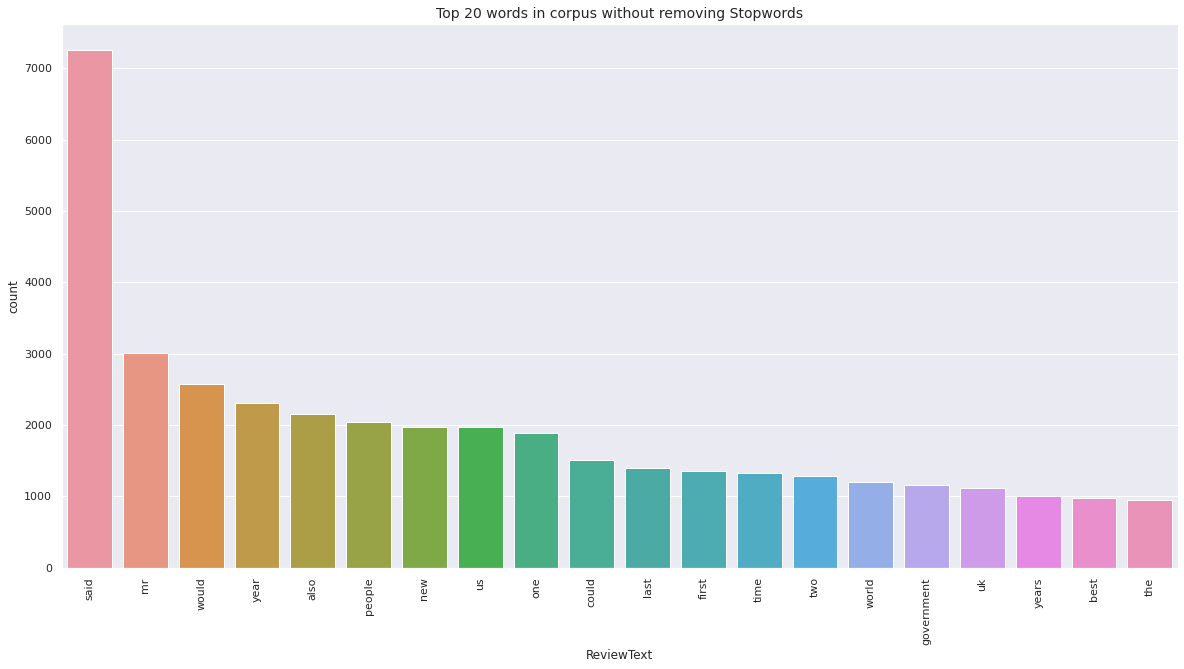

In [ ]:
# get top words using function
common_words = get_top_n_words(corpus_df, n = 20)

# create dataframe 
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

# plot top 20 words
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
sns.barplot(x='ReviewText', y='count', data=df1)
ax.set_title( "Top 20 words in corpus without removing Stopwords" , size = 14 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('top_n_words.png')

**Word Cloud:**

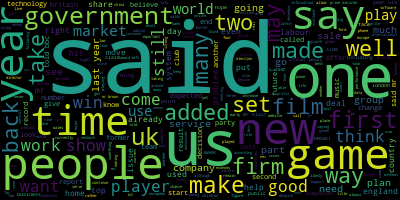

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(corpus_df['article_content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

# wordcloud.to_file("img/first_review.png")

As early mentioned nltk stopwords is not an exhaustive list of stopwords some are domain specific too. From the intution, here Iam considering some as non textual tokens and decide to drop from the corpus.

In [ ]:
# non contextual words
stopwords_ = ['said', 'make', 'made', 'still', 'take', 'way', 'already', 'see', 'set','good','may','much','back','go','come']

def removing_stopwords_(sub):
  '''
  returns strings which not having defined stopwords
  '''
  # returns list of strings
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")

  # to stores tokens
  msg = []

  # null string to joint list of strings
  final2       = ' '  

  # loop through the list of strings
  for elem in tokenizer.tokenize(sub):

    # conditional statement
    if elem.lower() not in stopwords_:
      msg.append(elem)

  return final2.join(msg)

In [ ]:
# apply function to corpus
corpus_df['article_content'] = corpus_df['article_content'].apply(removing_stopwords_)

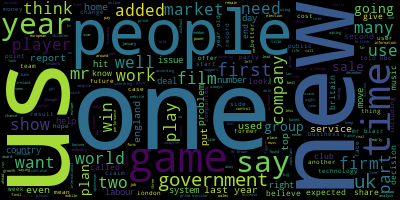

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(corpus_df['article_content'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()


**Bi-gram:**

Bigram is sequence of two words.
nltk bigrams calculted by

number of possible bigrams = N - ( n - 1 )

  N = Length of vocabulary

  n = number of sequence words, if bigram n = 2.

In [ ]:
def get_top_n_bigram(corpus, n=None):

    ''' 
    This functions takes entire corpus and returns list of tuple in  pair words and number of its occurence.
    '''
    # creates instance of count vectorizer for bigrams
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)

    # returns sparse matrix of index as documents and columns as Bow as features
    bag_of_words = vec.transform(corpus)

    # returns 2D array with count of features in corpus
    sum_words = bag_of_words.sum(axis=0) 

    # returns list of tuples with text,counts pair
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # sort the list of tuples by its number of occurence
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    # returns list of tuples top n words
    return words_freq[:n]

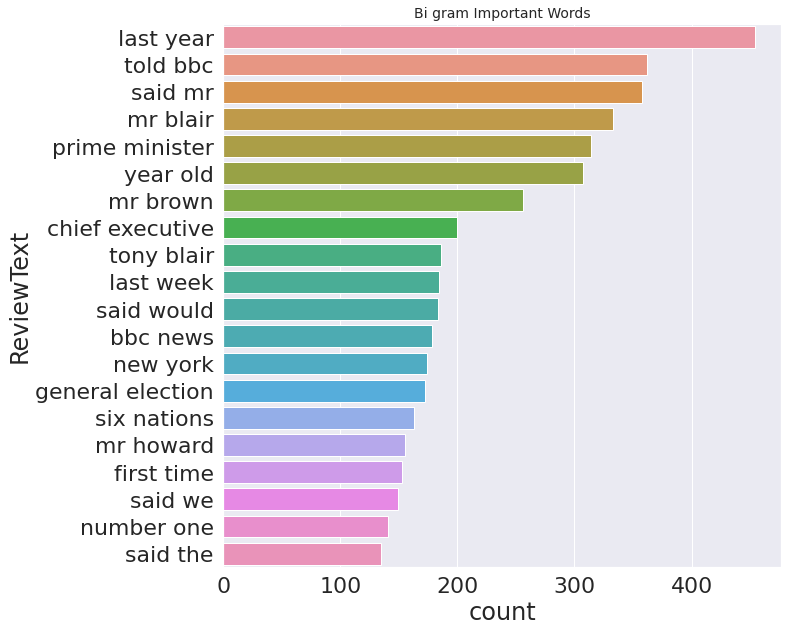

In [ ]:
# get top words using function
common_words = get_top_n_bigram(corpus_df['article_content'], n = 20)

# creates dataframe from list of tuples 
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

# plot top 20 words
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.set(font_scale = 2)
sns.barplot(y='ReviewText', x='count', data=df1)
ax.set_title( "Bi gram Important Words" , size = 14 )


fig.savefig('top_n_words2.png')

**Tri-Gram:** Top 20 words considering sequence of three words.

In [ ]:
def get_top_n_trigram(corpus, n=None):

    ''' 
    This functions takes entire corpus and returns list of tuple in  pair words and number of its occurence.
    '''
    # creates instance of count vectorizer for bigrams
    vec = CountVectorizer(ngram_range=(3, 3)).fit(corpus)

    # returns sparse matrix of index as documents and columns as Bow as features
    bag_of_words = vec.transform(corpus)

    # returns 2D array with count of features in corpus
    sum_words = bag_of_words.sum(axis=0) 

    # returns list of tuples with text,counts pair
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]

    # sort the list of tuples by its number of occurence
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)

    # returns list of tuples top n words
    return words_freq[:n]

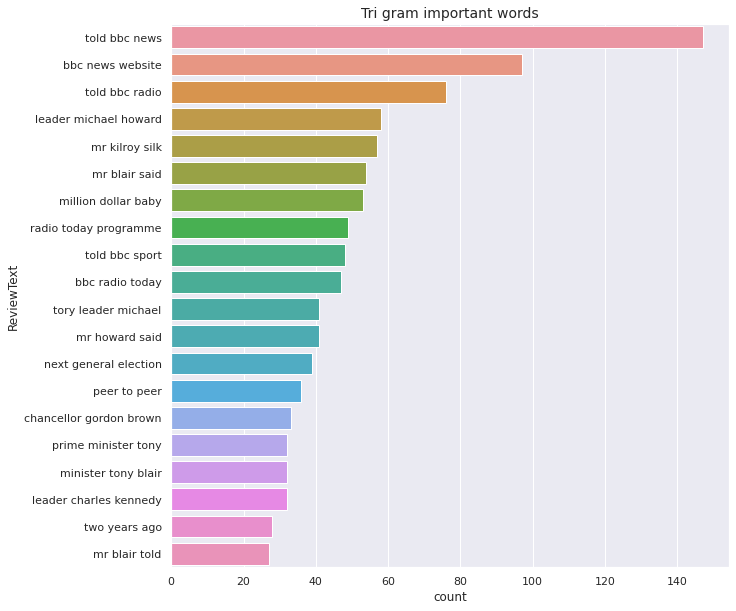

In [ ]:
# get top words using function
common_words = get_top_n_trigram(corpus_df['article_content'], n = 20)

# creates dataframe from list of tuples
df1 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])

# plot top 20 frequent trigrams
fig, ax = plt.subplots(figsize = ( 10 , 10 ))
sns.set(font_scale=1)
sns.barplot(y='ReviewText', x='count', data=df1)
ax.set_title( "Tri gram important words" , size = 14 )


fig.savefig('top_n_words3.png')

**Parts of speech:** 

As we all know general Parts of speech are nouns, verb, adverbs, adjectives, pronouns, conjunction and their sub-categories. In that noun and verbs are contributing more to the context. Lets examine what PoS's that abundant over our corpus. 


In [ ]:
# import lib textblob
from textblob import TextBlob

In [ ]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

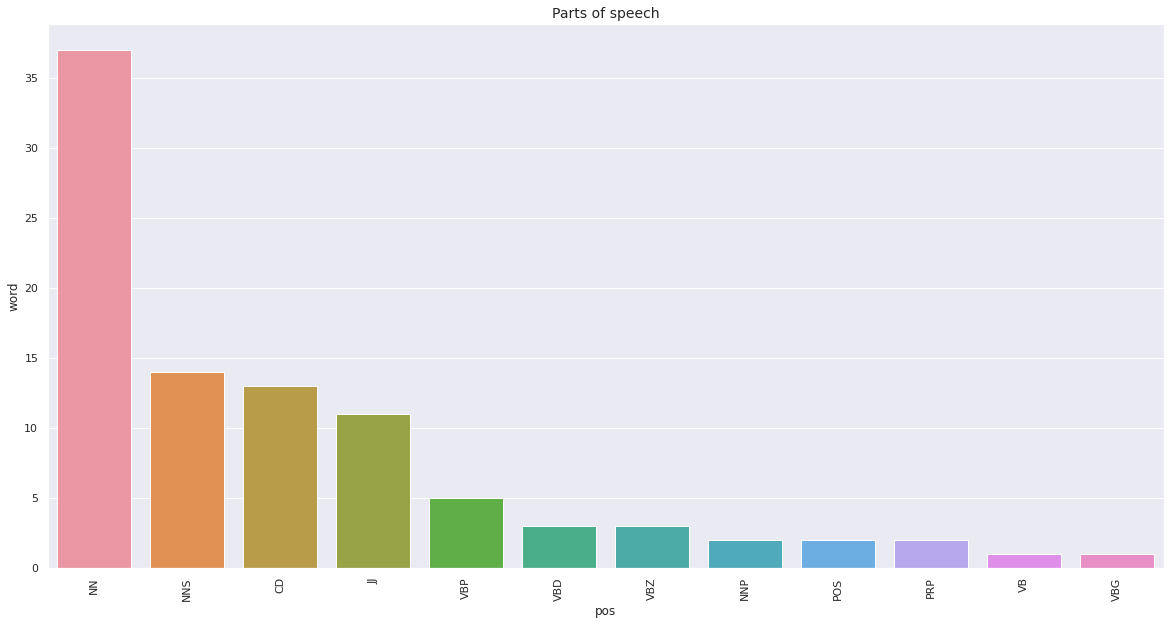

In [ ]:
# returns list of tuples in text PoS tagging pair 
blob = TextBlob(str(corpus_df['article_content']))

# creates dataframe from the list of tuples
pos_df = pd.DataFrame(blob.tags, columns = ['word' , 'pos'])

# plot the PoS rate
fig, ax = plt.subplots(figsize = ( 20 , 10 ))
sns.barplot(x='pos', y='word', data=pos_df.groupby('pos',as_index=False).agg({'word':'count'}).sort_values(by='word',ascending=False))
ax.set_title( "Parts of speech" , size = 14 )
for item in ax.get_xticklabels():
    item.set_rotation(90)

fig.savefig('PoS.png')

Corpus contains most of Nouns and Verbs its adds sense to context.And some cardinal numbers and Adjectives.

**Word Normalization:** 
  In english, a word will appear different form with respect to the context. For an instance, a word sing will deform like sung, singing, sang, sings these are inflated from the root "sing". This is knowm an lemma.

  There two technique that prevelently used 

*   Stemming
*   Lemmatization

**Stemming:**
  The process of cutting stem of the word. In singing returns to sing. Stemming follows some hueristics and just rid of the stem of the words without taken care of context. Some over-stemming will collapse the context.

**Lemmatization:**
considers the context and converts the word to its meaningful base form, according to the english dictionary meaning of the word.

If we stem the word "caring" it returns "car" but lemmatization results "care". Here we are using lemmatization for our topic modelling.



   

**Lemmatization:**

In [ ]:
# import require library for lemmatization
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

def get_lemma2(sub):

  '''
  function returns root word from the inflated ones
  '''
  
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")
  msg2 = []
  final3       = ' '  
  for elem in tokenizer.tokenize(sub):
    msg2.append(WordNetLemmatizer().lemmatize(elem))

  return final3.join(msg2)

In [ ]:
# applying function to articles
corpus_df['article_content'] = corpus_df['article_content'].apply(get_lemma2)

In [ ]:
print(corpus_df['article_content'][1283])

blunkett hint election call ex -home secretary david blunkett given fresh clue general election announced monday told bbc radio five live "i'm constituency getting ready presume announcement shortly weekend ." clarified meant would sheffield seat weekend expected election call tony blair tipped ask queen monday dissolve parliament ready poll


**Removing tokens whose size less than 3:**

As manually went throgh, some document has tokens like "mr", "\s", these tokens occurs frequently but not destruct the context when removing that. Therefore, let contain tokens whose length only graeter then or equal to 3.

In [ ]:
def remove_tokens(sub):

  '''
  fubction takes list of list tokens and returns list of tokens whose length greater or equals to 3
  '''
  # returns list of strings
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")

  # to store tokens
  msg2 = []

  # convert list of strings to single string
  final3       = ' '  

  # loop through list of tokens
  for elem in tokenizer.tokenize(sub):

    # conditional statement
    if len(elem) >= 3:
      msg2.append(elem)

  return final3.join(msg2)

In [ ]:
# applying function to the articles
corpus_df['article_content'] = corpus_df['article_content'].apply(remove_tokens)

In [ ]:
corpus_df['final_length'] = corpus_df['article_content'].apply(length)

In [ ]:
corpus_df.head()

,article_content,Topics,length_article,after_rem_punc_length,after_rem_stop_length,after_rem_num,final_length
0,yukos unit buyer face loan claim owner embattl...,business,291,275,170,170,156
1,sale boost time warner profit quarterly profit...,business,489,447,280,267,241
2,dollar gain greenspan speech dollar hit highes...,business,428,396,245,244,213
3,trade gap hit record gap export import hit -ti...,business,375,345,225,213,187
4,high fuel price hit profit british airway blam...,business,463,426,294,278,242


**Text Reduction:**

In [ ]:
after_preprocessing = corpus_df['final_length'].sum()
after_preprocessing

469260

In [ ]:
# divide rwa data over processed data 
percentage_of_reduction = (after_preprocessing / number_words_in_corpus) *100
percentage_of_reduction.round(2)

49.04

Almost 50% non contexual words are removed from the corpus. It will lessens the model complexity a pretty much.

**Tokens Reduction:**

**Segment distribution in corpora:**

In [ ]:
# gropuby w.r.t topics
Topics_distribution = corpus_df.groupby('Topics',as_index=False).agg({'length_article':'count'}).rename(columns={'length_article':'count'}).sort_values(by='count',ascending=False)

def weightage(doc):

  '''
  fubction returns weightage of individual segment among the corpus
  '''

  return (doc / corpus_df['article_content'].count()) * 100

# apply function 
Topics_distribution['weightage'] = Topics_distribution['count'].apply(weightage)
Topics_distribution

,Topics,count,weightage
3,sport,511,22.966292
0,business,510,22.921348
2,politics,417,18.741573
4,tech,401,18.022472
1,entertainment,386,17.348315


**Mid Summary:**
Start with aggregating individul article to single dataframe, some data exploration carried out , followed by series of preprocessing steps carried out and noticed how we vocabulary size reduced every individual steps. Now our data prepared to get in to model. 

Corpus going to face three different models and lets compare which model learning makes sense at the end of the day.

**Latent sementic Analysis(LSA):** 

Information retreival technique that build over the frame work of singular value Decomposition(SVD). LSA assumes two assumption about documents.



*   A word is characterized by the company it keeps.
*   words with similar meanings appear frequently together.

**Document Term matrix:**
LSA takes Document - term matrix as input. Matrix contains documents in index and BoW in columns, rows occupied by the weightage of the words in document and among the corpus.

**TF-IDF:**
This weightage determined using an transformation function called TF-IDF. Function driven combination of two factors **Term Frequency(TF)** and **Inverse Document Frequency(IDF)**

**Term Frequency:** weights detremine by number of times term "t" occur in an document divided by length of the particular document.

Term Frequency(TF) = Term "t" count in doc / Total number of words in Doc.

This function gives more important to frequently occuring texts and lesser importance to rare texts. In most cases it looses important rare words.

**Inverse Document Freqency(IDF):** As name implies it calculate document frequency and inverse of it.

Document frequency = No. of. Documents the term "t" occurs / Total number of documents
By taking inverse we can overcome the issue we facen while using TF. when particular term occurs freqently in most of the documents then this function penalize and reduce its weightage. To avoid handling huge numbers we are taking log to the IDF.

TF-IDF = (Term "t" count in doc / Total number of words in Doc) * log(No. of. Documents the term "t" occurs / Total number of documents)








**TF-IDF**

In [ ]:
# extracting values from df to array
corpus = corpus_df['article_content']

**Uni-gram:**

In [ ]:
# import tfidf vectorizer from sklearn
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# creating unigram TFIDF matrix

vectorizer = TfidfVectorizer(ngram_range=(1,1))
corpus_uni = vectorizer.fit_transform(corpus)


This returns a sparse matrix. In sparse matrix most of the elements are zero.

In [ ]:
tfidf_df = pd.DataFrame(corpus_uni.toarray(), 
                        columns=vectorizer.get_feature_names())
tfidf_df.head()

,00,000,000bn,000m,000s,000th,001,001and,001st,004,0051,01,0100,011,02,028,03,033,037,03bn,04,041,04bn,04m,04secs,05,050,0530,0530gmt,056,05bn,05m,06,060,069,06bn,07,070,072,08,...,zen,zenden,zenith,zephaniah,zephyr,zeppelin,zero,zeta,zhang,zhaoxing,zheng,zib,zidane,ziers,zillion,zimbabwe,zinc,zinedine,zip,ziyi,zodiac,zoe,zoellick,zogbia,zola,zomba,zombic,zombie,zone,zonealarm,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.022217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.025318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The above dataframe contains 2225 documents as index and 26183 columns as features. Lets check some features.

**Singular Value Decomposition:** 
 Latent sementic analysis uses singular value decomposition for information retreival from Document Term matrix. Technique factorise the single huge sparse matrix into three small matrix. 

                      [A] ~ [U] [S] [V.T]

                      [A] = Document Term matrix(TFIDF output) 

                      [U] = Document Topic matrix

                      [v_transpose] = Term Topic matrix

                      [S] = Singular diagonal matrix

U and V are orthagonal matrix. 

In sklearn SVD implemtation, we can tune shape of S matrix. For handling sparse matrix we considering low rank matrix. This method is known as Truncated SVD.

 
 

In [ ]:
from sklearn.decomposition import TruncatedSVD

**Parametre Explanation:**

**n_components** = are singular values that we are expecting for, and n_components will trunc the original sparse matrix by retreiving high informtion from the data. Generally sparse matrix are low rank matrix. Here Iam considering first 10 non negative singular values to represent latents.

**n_iter:** took 100 iteration to handle sparse matrix smoothly.

**random_state** for reproducability


In [ ]:
# creating instance of truncated SVD 
svd_uni_model = TruncatedSVD(n_components=10, n_iter=100, random_state=42)

In [ ]:
# returns document topic matrix
tfidf_lsa_data = svd_uni_model.fit_transform(corpus_uni)

# diagonal non negative singular matrix
Sigma = svd_uni_model.singular_values_

# term topic matrix
V_T = svd_uni_model.components_.T

In [ ]:
tfidf_lsa_data.shape,V_T.shape

((2225, 10), (26200, 10))

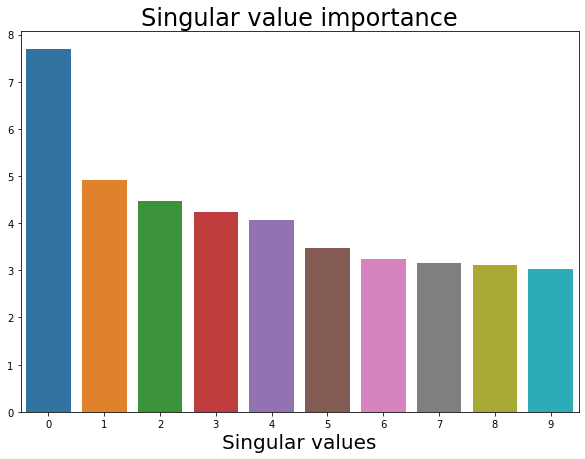

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
sns.barplot(x=list(range(len(Sigma))), y = Sigma)
ax.set_xlabel( "Singular values" , size = 20 )
ax.set_title( 'Singular value importance' , size = 24 )
fig.savefig('sigma.png')

**Important words in Each Topic:**

In [ ]:
# create term topic dataframe
term_topic_matrix = pd.DataFrame(data=V_T,index = vectorizer.get_feature_names(), columns=[f'Latent_concept_{i}' for i in range(0,10)])
term_topic_matrix.head()

,Latent_concept_0,Latent_concept_1,Latent_concept_2,Latent_concept_3,Latent_concept_4,Latent_concept_5,Latent_concept_6,Latent_concept_7,Latent_concept_8,Latent_concept_9
00,0.000846,-0.000278,-0.000102,-0.000034,-0.000046,0.000246,-0.000666,0.001692,0.001352,0.001212
000,0.057808,0.004090,0.035408,0.010921,0.017069,-0.001515,-0.000462,0.034463,-0.014157,-0.006591
000bn,0.000247,-0.000020,0.000477,-0.000102,0.000577,0.000463,-0.000232,-0.000148,-0.000248,-0.000398
000m,0.006256,-0.008093,-0.011163,-0.008557,0.003748,0.004330,-0.006368,0.026067,0.035957,0.021100
000s,0.000203,-0.000145,0.000252,0.000008,-0.000436,0.000082,0.000195,0.000328,-0.000314,-0.000143


Here row represents the bag of words of entire corpus and column represents the singular values those are Fifteen topics that assigned to the corpus. lets analyse the individual topic and what its talk about.

**N_component 1**

we're concentrating top 10 words in every documents after 20 most of the texts are common across the documents.

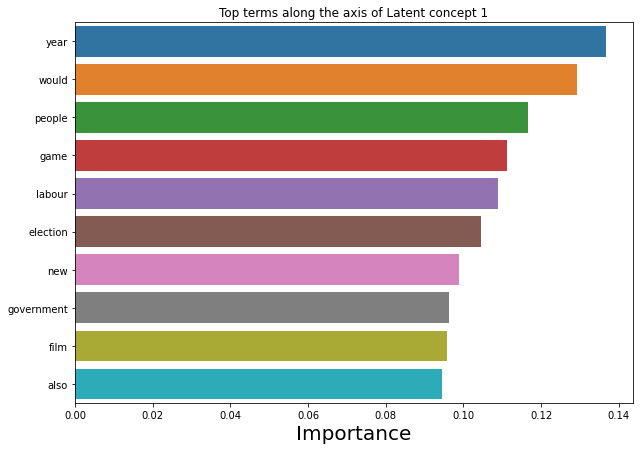

In [ ]:
# slicing topic 1 from dataframe
data = term_topic_matrix['Latent_concept_1']

# sort by descending manner
data = data.sort_values(ascending=False)

n_top_words = 10

# slice top 10 words
top_10 = data[:n_top_words]


# plot top 10 words
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
fig = sns.barplot(x= top_10.values, y=top_10.index)
ax.set_xlabel( "Importance" , size = 20 )
ax.set_title('Top terms along the axis of Latent concept 1')
ax.figure.savefig('Latent_concept_1.png')?

**Latent Concept 5**

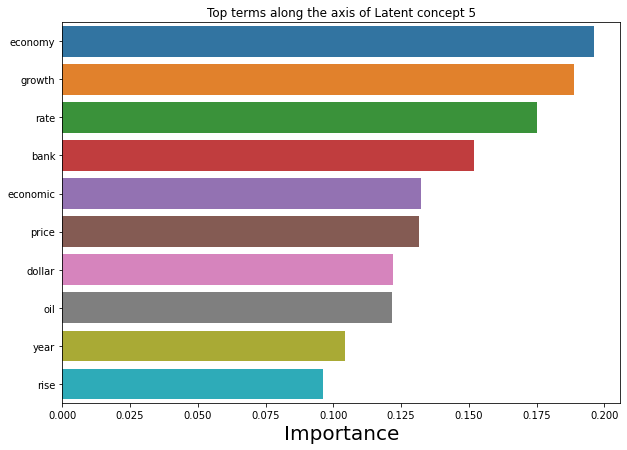

In [ ]:
# slicing topic 5 from dataframe
data = term_topic_matrix['Latent_concept_5']

# sort by descending manner
data = data.sort_values(ascending=False)

# slice top 10 words
top_10 = data[:10]


# plot top 10 words
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
fig = sns.barplot(x= top_10.values, y=top_10.index)
ax.set_xlabel( "Importance" , size = 20 )
ax.set_title('Top terms along the axis of Latent concept 5')
ax.figure.savefig('Latent_concept_5.png')

Lets gothrough last topic and understand what its all about

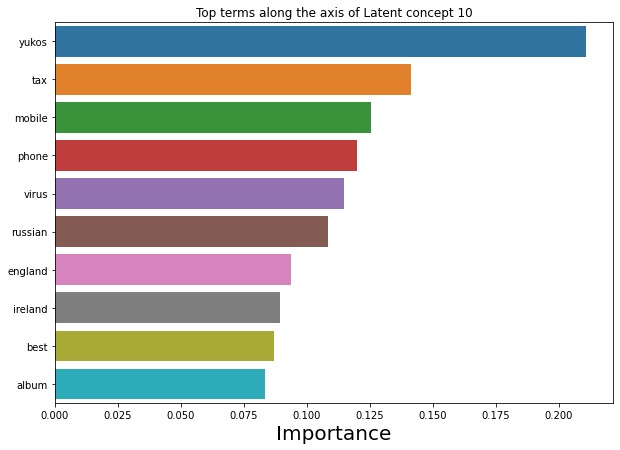

In [ ]:
# slicing topic 10 from dataframe
data = term_topic_matrix['Latent_concept_10']

# sorting descending manner
data = data.sort_values(ascending=False)

# slice top 10 words
top_10 = data[:10]


# plot top 10 words
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
fig = sns.barplot(x= top_10.values, y=top_10.index)
ax.set_xlabel( "Importance" , size = 20 )
ax.set_title('Top terms along the axis of Latent concept 10')
ax.figure.savefig('Latent_concept_10.png')

**Top 10 words in Every Topic:**

In [ ]:
def top_n_words_in_topic(doc,n):

  '''
  function returns top n words in each topics
  '''
  # slice the require topic from term topic matrix
  corp = term_topic_matrix[doc]

  # sort by decsending manner
  top_words = corp.sort_values(ascending=False)[:n].to_dict().keys()

  # return dictionary 
  return f'{doc} important words are {top_words}'


In [ ]:
# apply function
words = []
top_words = 10

for topics in term_topic_matrix.columns.tolist():
  words.append(top_n_words_in_topic(topics,top_words))

In [ ]:
# helper snippets
dictionary_  = {}
for index,lists in enumerate(words):
  value = lists[47:-1]
  dictionary_[index] = value

In [ ]:
dictionary_

{0: "['year', 'would', 'people', 'game', 'labour', 'election', 'new', 'government', 'film', 'also']",
 1: "['labour', 'election', 'blair', 'party', 'tory', 'brown', 'tax', 'government', 'minister', 'howard']",
 2: "['mobile', 'phone', 'technology', 'firm', 'service', 'market', 'growth', 'user', 'company', 'consumer']",
 3: "['film', 'award', 'best', 'oscar', 'actor', 'actress', 'festival', 'nomination', 'star', 'director']",
 4: "['economy', 'growth', 'rate', 'bank', 'economic', 'price', 'dollar', 'oil', 'year', 'rise']",
 5: "['yukos', 'court', 'law', 'lord', 'company', 'russian', 'software', 'firm', 'virus', 'gazprom']",
 6: "['virus', 'software', 'microsoft', 'program', 'user', 'search', 'spyware', 'site', 'security', 'mail']",
 7: "['music', 'chart', 'band', 'album', 'song', 'single', 'number', 'top', 'record', 'show']",
 8: "['mobile', 'phone', 'kenteris', 'iaaf', 'thanou', 'greek', 'athens', 'lord', 'olympic', 'test']",
 9: "(['yukos', 'tax', 'mobile', 'phone', 'virus', 'russian'

**Tri gram model:**

  Lets open a window and create model with tri-gram for better understanding.

In [ ]:
# craeting TFIDF matrix with trigram
vectorizer = TfidfVectorizer(ngram_range=(3,3))
corpus_tri = vectorizer.fit_transform(corpus)


In [ ]:
# creating trigram instance
svd_tri_model = TruncatedSVD(n_components=10, n_iter=100, random_state=42)

In [ ]:
# document topic matrix
svd_tri_matrix = svd_tri_model.fit_transform(corpus_tri)

# non negative singular value matrix with rank r = 10
Sigma = svd_tri_model.singular_values_

# texts topic matrix
V_T = svd_tri_model.components_.T

**Keys:**

In [ ]:
def get_keys(topic_matrix):
    '''
    returns an  column index(Topic) of dominant topic for each document from  document topic array of matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

In [ ]:
keys = get_keys(svd_tri_matrix)

In [ ]:
from collections import Counter

Counter returns dictionary, with key as topic and value as recurrence of topic over the corpus

In [ ]:
# create dictionary, key as topic index and value as recurrence of topic over the corpus
count_pairs = Counter(keys).items()

# from dictionar extract key(topic index) and store in list
categories = [pair[0] for pair in count_pairs]

# from dictionary extract value(topic distribution) and store in list
counts = [pair[1] for pair in count_pairs]

# create dataframe of two columns categories and counts
dict_ = {'categories':categories, 'counts':counts}
data = pd.DataFrame.from_dict(dict_)

# sort by descending order
topic_counts = data.sort_values(by='counts',ascending=False)

In [ ]:
topic_counts

,categories,counts
0,6,609
5,2,495
1,4,315
2,9,241
3,8,173
7,5,141
4,7,120
9,1,49
6,0,44
8,3,38


**Topic Distribution:**

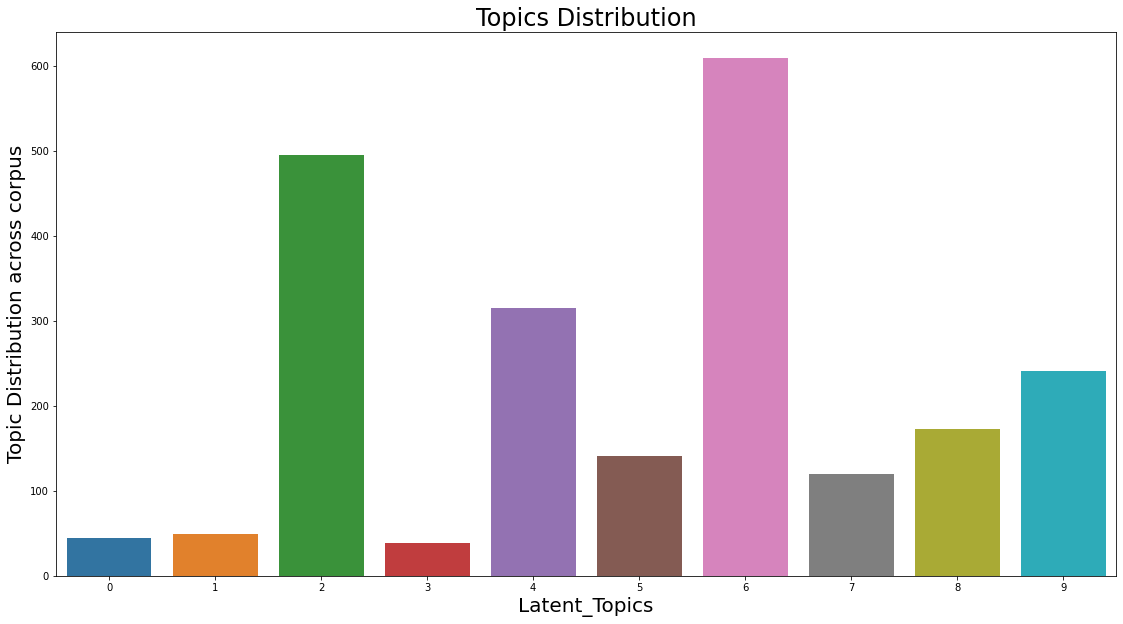

In [ ]:
fig, ax = plt.subplots(figsize = ( 19 , 10 ))
sns.barplot(x="categories", y="counts", data=topic_counts)
ax.set_xlabel( "Latent_Topics" , size = 20 )
ax.set_ylabel('Topic Distribution across corpus',fontsize=20);
ax.set_title( "Topics Distribution" , size = 24 )
fig.savefig('bar plot.png')

From above Topic_6 considers important topic for 600 documents, follows that topic 2 around 500 documents and Topic_5 over 308 Documents. 

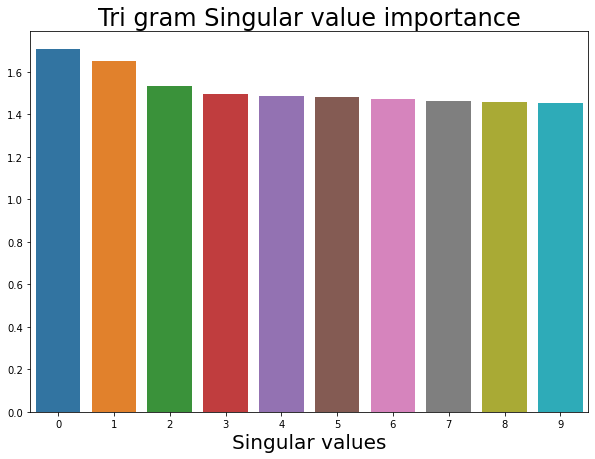

In [ ]:
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
sns.barplot(x=list(range(len(Sigma))), y = Sigma)
ax.set_xlabel( "Singular values" , size = 20 )
ax.set_title( 'Tri gram Singular value importance' , size = 24 )
fig.savefig('sigma2.png')


As we seen in uni_gram_model first topic had higher relevency score as compare to others. But in tri_gram model all topics had equal imporatance.

In [ ]:
# creating matrix from arrays
term_topic_matrix = pd.DataFrame(data=V_T,index = vectorizer.get_feature_names(), columns=[f'Latent_concept_{i}' for i in range(0,10)])
term_topic_matrix.head()

,Latent_concept_0,Latent_concept_1,Latent_concept_2,Latent_concept_3,Latent_concept_4,Latent_concept_5,Latent_concept_6,Latent_concept_7,Latent_concept_8,Latent_concept_9
00 59 000,6.753357e-11,1.925239e-10,3.663804e-09,4.495351e-10,1.969480e-08,2.762300e-08,7.394995e-08,-1.498596e-08,-2.148052e-08,3.444981e-08
00 early exit,7.451217e-10,8.981047e-09,1.635626e-08,2.522541e-09,1.378827e-07,3.317593e-09,5.574093e-08,1.769116e-08,1.545995e-08,-2.882045e-08
00 mark people,1.136730e-06,9.430080e-07,1.603010e-05,8.609598e-08,7.387001e-07,3.424093e-06,3.121322e-06,-1.307426e-06,9.580024e-07,-1.056864e-06
00 per minute,1.115121e-08,1.088392e-08,3.956283e-07,3.048941e-08,5.773538e-07,1.672870e-06,3.360503e-06,-9.952301e-07,-2.429239e-06,-3.117499e-06
00 qualifying mark,2.607082e-09,6.006596e-09,1.718752e-07,5.290869e-09,2.616621e-07,5.868912e-07,1.469573e-06,4.323271e-07,2.009568e-07,-2.001966e-07


**Visualize how topics spread across sementic space:**

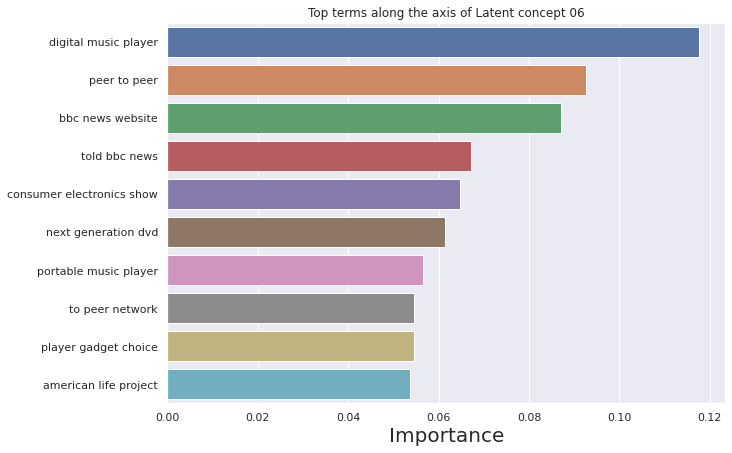

In [ ]:
# slicing topic 6 from dataframe
data = term_topic_matrix['Latent_concept_6']

# sort by descending manner
data = data.sort_values(ascending=False)

# slice top 10 words
top_10 = data[:10]

# plot top 10 words

fig, ax = plt.subplots(figsize = ( 10 , 7 ))
fig = sns.barplot(x= top_10.values, y=top_10.index)
ax.set_xlabel( "Importance" , size = 20 )
ax.set_title('Top terms along the axis of Latent concept 06')
ax.figure.savefig('TriLatent_concept_06.png')

**Latent_component_5:**

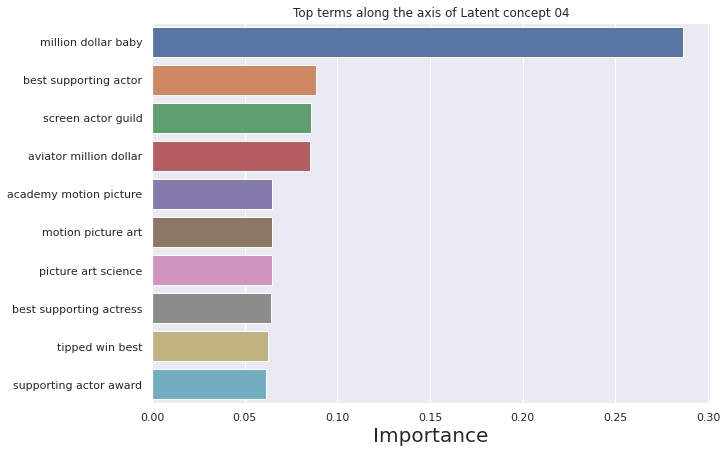

In [ ]:
# slicing topic 4 from dataframe
data = term_topic_matrix['Latent_concept_4']

# sort by descending manner
data = data.sort_values(ascending=False)

# slice top 10 words
top_10 = data[:10]

# plot top 10 words
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
fig = sns.barplot(x= top_10.values, y=top_10.index)
ax.set_xlabel( "Importance" , size = 20 )
ax.set_title('Top terms along the axis of Latent concept 04')
ax.figure.savefig('TriLatent_concept_04.png')

**Latent_component_8:**

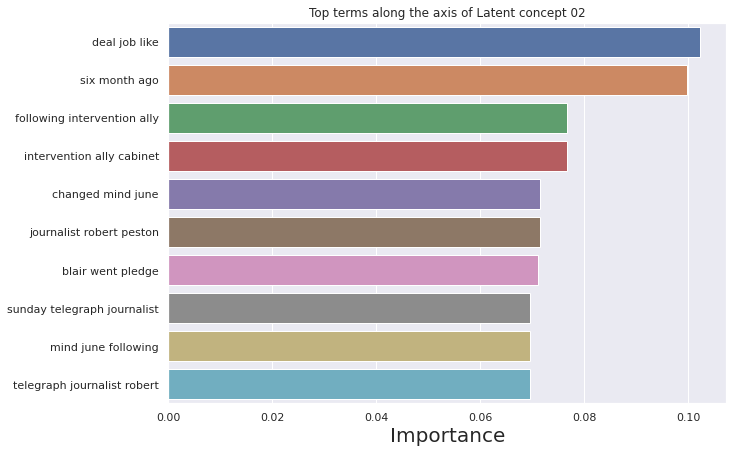

In [ ]:
# slicing topic 2 from dataframe
data = term_topic_matrix['Latent_concept_2']

# sort by descending manner
data = data.sort_values(ascending=False)

# slice top 10 words
top_10 = data[:10]

# plot top 10 words
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
fig = sns.barplot(x= top_10.values, y=top_10.index)
ax.set_xlabel( "Importance" , size = 20 )
ax.set_title('Top terms along the axis of Latent concept 02')
ax.figure.savefig('Latent_concept_02.png')

**Top 10 words in Every Topic:**

In [ ]:
top_words = 10
words = []
for topics in term_topic_matrix.columns.tolist():
  words.append(top_n_words_in_topic(topics,top_words))

In [ ]:
dictionary_  = {}
for index,lists in enumerate(words):
  value = lists[47:-1]
  dictionary_[index] = value

In [ ]:
dictionary_

{0: "['public sector union', 'want government withdraw', 'government withdraw regulation', 'local government worker', 'raise pension age', 'could walkout unless', 'six public sector', 'among balloted march', 'want pension promised', 'union 000 amicus']",
 1: "['guy mansfield warned', 'hand extremist what', 'real risk people', 'would driven hand', 'going stopped id', 'card going detained', 'young asian men', 'what going happen', 'margins society would', 'mansfield warned real']",
 2: "['deal job like', 'six month ago', 'following intervention ally', 'intervention ally cabinet', 'changed mind june', 'journalist robert peston', 'blair went pledge', 'sunday telegraph journalist', 'mind june following', 'telegraph journalist robert']",
 3: "['tech firm say', 'computer implemented invention', 'one click shopping', 'computer program internet', 'program internet business', 'internet business method', 'com hold patent', 'amazon com hold', 'based amazon com', 'patenting computer program']",
 4: 

So far we understand the intra-topic sementics, lets know how topics are related to each other.

**Getting dominant Topic in each department:**

In [ ]:
# create term topic dataframe
doc_topic_matrix = pd.DataFrame(data=svd_tri_matrix,index =[i for i in range(0,2225,1)], columns=[f'Latent_concept_{i}' for i in range(1,11)])
doc_topic_matrix.head()

,Latent_concept_1,Latent_concept_2,Latent_concept_3,Latent_concept_4,Latent_concept_5,Latent_concept_6,Latent_concept_7,Latent_concept_8,Latent_concept_9,Latent_concept_10
0,5.280226e-06,6.269307e-06,0.000218,2.566399e-06,0.000109,0.000444,0.000544,-1.549496e-04,-5.062087e-05,-0.000087
1,2.097681e-06,1.257580e-06,0.000071,6.048258e-05,0.000527,0.000421,0.001255,-7.059238e-04,-7.309733e-04,-0.001677
2,7.472906e-06,3.668035e-07,0.000014,1.579682e-06,0.000032,0.000004,0.000013,-9.181229e-07,-8.539914e-07,-0.000009
3,2.319888e-07,2.860136e-07,0.000003,1.308289e-07,0.000006,0.000008,0.000016,-3.005522e-05,-5.388066e-07,0.000048
4,1.340051e-04,4.021281e-06,0.000074,7.576420e-05,0.000094,0.000416,0.000786,-2.317639e-03,2.483937e-03,0.000044


**Dominant Topic from Each Document:**

 Document Topic matrix, The topic which has more weighted texts, which is considered as dominant topic for that documents. argmax() along axis=1. helps us to get dominant topics.

In [ ]:
# converting matrix to array and applying argmax
dominant_topic  = np.argmax(doc_topic_matrix.values, axis=1)

**t_SNE:** t-distribution Sochastic Neighbor Embedding. This technique helps visual understanding how the topics are  inter-related sementic space by reducing the dimensionality. 

Benifits of tSNE over PCA:

*   algorithm is non-linear
*   It finds the pairwise probability distribution within vicinity in high dimension using Gaussian distribution

*   Then its finds same pair conditional probability within vicinity in low dimentional here its using t-distribution by the virtue of having heavy tail.
*   Then model finds the function called "Kullback-Leibler divergence" to map higher dimensional to lower dimension with same probabilities. Remain kulback Leibler is not an converging function.





In [ ]:
# import tsne 
from sklearn.manifold import TSNE

**t-SNE Prametres:**

*   **n_components = 02** number of topics(axis) to preserve from higher dimensional
*   **perplexity = 40**  The perplexity is related to local density from the query point. Larger the perplexity complex the learning.



In [ ]:
# creating instance of tSNE
tsne = TSNE(n_components=2,random_state=143,perplexity=40,n_iter=5000)

# returns 2Dimensional matrix
X_tsne = tsne.fit_transform(doc_topic_matrix)

In [ ]:
# comparing shapes
X_tsne.shape,doc_topic_matrix.shape

((2225, 2), (2225, 10))

In [ ]:
# np arrays to dataframe
x_tsne_df = pd.DataFrame(X_tsne,columns=['pc1','pc2'])
x_tsne_df.head()

,pc1,pc2
0,5.066958,23.568209
1,23.086914,20.208927
2,-18.527470,-41.958675
3,-14.199337,-21.559267
4,38.917515,-20.657412


In [ ]:
# assigning dominant topic for each document
x_tsne_df['Dominant_Topic'] = dominant_topic

**Taking top three words from each topic:**

In [ ]:
top_words = 3
top_3_words = []
for topics in term_topic_matrix.columns.tolist():
  top_3_words.append(top_n_words_in_topic(topics,top_words))
top_3_word_dictionary  = {}
for index,lists in enumerate(top_3_words):
  value = lists[47:-1]
  top_3_word_dictionary[index] = value

In [ ]:
top_3_word_dictionary

{0: "['public sector union', 'want government withdraw', 'government withdraw regulation']",
 1: "['guy mansfield warned', 'hand extremist what', 'real risk people']",
 2: "['deal job like', 'six month ago', 'following intervention ally']",
 3: "['tech firm say', 'computer implemented invention', 'one click shopping']",
 4: "['million dollar baby', 'best supporting actor', 'screen actor guild']",
 5: "['robert kilroy silk', 'call radical alliance', 'empire the problem']",
 6: "['digital music player', 'peer to peer', 'bbc news website']",
 7: "['peer to peer', 'to peer network', 'sharing music movie']",
 8: "['peer to peer', 'anti virus software', 'anti spyware tool']",
 9: "(['digital music player', 'player gadget choice', 'american life project']"}

**Visualizing tSNE output:**

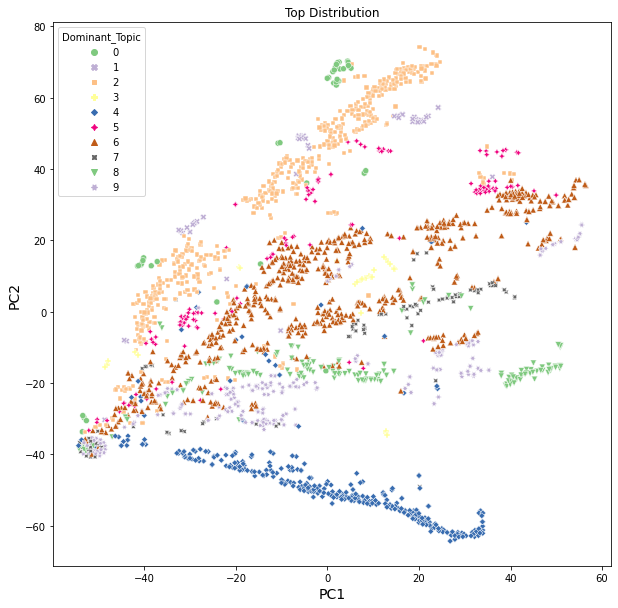

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = 'pc1',y='pc2',hue='Dominant_Topic',data=x_tsne_df,style='Dominant_Topic',palette='Accent')
ax.set_xlabel( "PC1" , size = 14 )
ax.set_ylabel( "PC2" , size = 14 )
ax.set_title('Top Distribution')
ax.figure.savefig('tSNE Plot')

As seen above LSA performs well in extract toppic. 

**Latent Dirichlets Allocation:**

Unlike LSA , LDA is an statistical model and recursive in nature . It randomly assign topic to each words and determine conditional probability of words to topic. And able to extract relation between the variables. Since LDA is statistical model it makes two assumption about documents. 



**LDA Assumptions:**

*   Document can have multiple topics
*   Topics comprises of group of words. Every words may belongs to multiple Topics.

It builds a topic per document model and words per topic model, modeled as Dirichlet distributions. Model uses Latent Distribution to get prior probabilities. Important feature, Dirichlet distribution is multinomial distribution it takes vector value inputs.

Since LDA estimates P( WORD / TOPIC K) its an generative model that uses Bayesian theorm. This theorm finds the posterior probability from given prior probabilities and likelihood function. Likelihood function P (TOPIC K / WORD) calculated by the model and P(TOPIC K) and P( WORD) are two dirichlet distribution parameters alpha and beta, considered as prior probabilities.

In [ ]:
import gensim

In [ ]:
# tokenizing strings
def tokenizer(doc):
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")
  tokenized_doc = tokenizer.tokenize(doc)
  return tokenized_doc

In [ ]:
# copying df
corpus_df_2 = corpus_df.copy(deep=True)

In [ ]:
# applying function
corpus_df_2['article_content'] = corpus_df_2['article_content'].apply(tokenizer)

**Bigram and Trigram models:**

Unlike sklearn, gensims count frequently occuring words and based on threshold.Then combine those words by "__". Its works by co-occurence score. Its require two inputs..





*   min_count ignore all words and bigrams with total collected count lower than input value. By default it value is 5
*   threshold represents a threshold for forming the phrases (higher means fewer phrases). Words a and b is accepted if score greater than  threshold, where N is the total vocabulary size. By default it value is 10.0.

Score(a, b) = count(a,b) - Size of the Vocabulary / count(a) * count(b)

If the score greater than the given threshold, that bigram is considerable.


In [ ]:
# import phrase for creating bigrams
from gensim.models import Phrases

In [ ]:

# Add bigrams and trigrams to docs.
bigram = Phrases(corpus_df_2['article_content'], min_count=1)


for idx in range(len(corpus_df_2['article_content'])):
    for token in bigram[corpus_df_2['article_content'][idx]]:
        if '_' in token:
            # Token is a bigram, add to document.
            corpus_df_2['article_content'][idx].append(token)


**Hold-out-sample:**

  Lets hold out one document randomly per segement from the model for evaluating model learning quality after training. 

In [ ]:
# Hold out one document from business
hold_out_1 = corpus_df_2.iloc[507]['article_content']

# Hold out one document from entertainment
hold_out_2 = corpus_df_2.iloc[892]['article_content']

# Hold out one document from politics
hold_out_3 = corpus_df_2.iloc[899]['article_content']

# Hold out one document from sport
hold_out_4 = corpus_df_2.iloc[1317]['article_content']

# Hold out one document from Tech
hold_out_5 = corpus_df_2.iloc[2100]['article_content']

Drop the test documents from the corpus to train the model.

In [ ]:
# dropping test documents from corpus
corpus_df_2 = corpus_df_2.drop([507,892,899,1317,2100],axis=0)

In [ ]:
# import library for LDA
from gensim import corpora
from gensim.corpora import Dictionary

**Dictionary:**
Gensims dictionary returns texts of entire corpora as key and each corresponding unique IDs based on alphabetical orders. Its an prerequisite for lda model in gensims. 

In [ ]:
# creating dictionary 
word_to_ID = Dictionary(corpus_df_2['article_content'])

**Doc2bow:** As like countvectorizer in sklearn, gensims have doc2bow, its simply returns dictionary pairs contain key as id of word obtain throgh Dictionary and values as frequency of query word in the document.

In [ ]:
print(corpus_df_2['article_content'][0])

['yukos', 'unit', 'buyer', 'face', 'loan', 'claim', 'owner', 'embattled', 'russian', 'oil', 'giant', 'yukos', 'ask', 'buyer', 'former', 'production', 'unit', 'pay', '$900', '(£479m)', 'loan', 'state', '-owned', 'rosneft', 'bought', 'yugansk', 'unit', '$9.3', 'sale', 'forced', 'russia', 'part', 'settle', '$27.5', 'tax', 'claim', 'yukos', 'yukos', 'owner', 'menatep', 'group', 'say', 'ask', 'rosneft', 'repay', 'loan', 'yugansk', 'secured', 'asset', 'rosneft', 'face', 'similar', '$540', 'repayment', 'demand', 'foreign', 'bank', 'legal', 'expert', 'rosneft', 'purchase', 'yugansk', 'would', 'include', 'obligation', '"the', 'pledged', 'asset', 'rosneft', 'pay', 'real', 'money', 'creditor', 'avoid', 'seizure', 'yugansk', 'asset', 'moscow', '-based', 'lawyer', 'jamie', 'firestone', 'connected', 'case', 'menatep', 'group', 'managing', 'director', 'tim', 'osborne', 'told', 'reuters', 'news', 'agency', '"if', 'default', 'fight', 'rule', 'law', 'exists', 'international', 'arbitration', 'clause', 'c

 while LDA is a probabilistic model that tries to estimate probability distributions for topics in documents and words in topics. The weighting of TF-IDF is not necessary for this.

In [ ]:
# returns list of tuples, in BoW and frequency pair
corpus = [word_to_ID.doc2bow(doc) for doc in corpus_df_2['article_content']]

**LDA Base model with default hyperparametre:**

In [ ]:
# import LDA model from gensims
from gensim.models import LdaModel

**Parametric Explanation:**

*   corpus = Doc2bow ID Frequency pair
*   id2word = Dictionary word ID pair

*   Chunk size = 400, LDA is recurssive process, for every iteration it took 400 documens.
*   Passes = 20, algorithm will run 20 times over the corpus.

*   per_word_topics = True, will used to extract most likely topics for a given word
*   random_state = Since LDA randomly intiates the topics, it returns different probility for every run. Random state helps to seed the output of LDA.







In [ ]:
# create instance for LDA
lda = LdaModel(corpus=corpus,num_topics = 10, id2word = word_to_ID, chunksize=400, passes=20,random_state=100,per_word_topics=True)

**Model Evaluation:**

  For Information retreival task like Topic modelling, there two metrics to judge the model performance.

*   Perplexity
*   Coherence score

**Perplexity:** is a mesure of model complication by trained model when exposed to unseen documents. For good model perplexity score should be less. Higher the score model not generlise well.

**Coherence score:** is measure of sum of sementic similarity between most occurence words for every topic. 

Lets measure both metric for the model..



In [ ]:
# per word likelihood as perplexity
lda.log_perplexity(corpus)

-9.315361484929888

Less perplexity is a good model.

In [ ]:
# import coherence model 
from gensim.models import CoherenceModel

**Coherence Measure:**
  This measure explains how quality our learned topics. These measurements help to distinguish between the topics. 

  Topic Coherence score = D(wi, wj) / D(wi)

  D(wi, wj) = Number of Documents that having both words occurs together in particular topic
  D(wi)     = Number of documents that word(wi) occurs alone in particular topic.

  wi, wj are top words of that particular topic.

  Higher the coherence score model can able to place similar words in same topic

The main goal of measuring topic coherence is, if two words in a topic really belong together you would expect them to show up together a lot. 

There many variants of coherence metric available, here we are using "c_v"

In [ ]:
coherence_model_lda = CoherenceModel(model=lda, texts=corpus_df_2['article_content'], dictionary=word_to_ID, coherence='c_v',)
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.58362338982502


We got 58% coherence between the words inside topics with default alpha, beta values. Lets tune some learning parametre in expectation of increased coherence.

As said above, LDA has two Hyperparametre alpha and beta.

alpha - Document-Topic Density

beta - Topic-word Density

  Apart from these two there is another parametre number of topics required.

  Here we're creating individual loop for each parametric range rather than gridsearch.To get a optimal parametres to increases the coherence score.



**Tunning Number of Topics:**

In [ ]:
# parametric range for number of topics 
n_topics = [5,6,7,8,9,11,15]

# store resulted coherence
coherence_dict = {}
perplexity_dict = {}

# loop through model
for i in n_topics:
  lda = LdaModel(corpus=corpus,num_topics = i, id2word = word_to_ID, chunksize=400, passes=20,random_state=100)
  
  # calculating coherence
  coherence_model_lda = CoherenceModel(model=lda, texts=corpus_df_2['article_content'], dictionary=word_to_ID, coherence='c_v',)
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_dict[f'no_of_topic_{i}'] = coherence_lda

  # calculating perplexity
  perplexity_ = lda.log_perplexity(corpus)

  perplexity_dict[f'no_of_topic_{i}'] = perplexity_



**Compring models:**

In [ ]:
comparison_df1 = pd.DataFrame.from_dict(coherence_dict.items())
comparison_df2 = pd.DataFrame.from_dict(perplexity_dict.items())
comparison_df  = pd.merge(comparison_df1,comparison_df2, on=0, how='outer')
comparison_df.rename(columns={0:'Num_of_topic','1_x':'Coherenre_score','1_y':'perplexity'},inplace=True)
comparison_df.set_index('Num_of_topic',inplace=True)

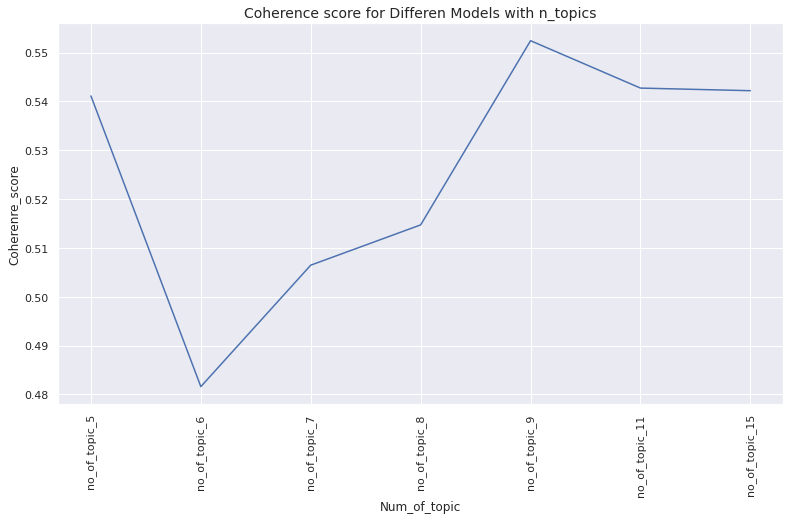

In [ ]:
fig, ax = plt.subplots(figsize = ( 13 , 7 ))
sns.lineplot(data=comparison_df['Coherenre_score'])
ax.set_title( "Coherence score for Differen Models with n_topics" , size = 14 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('coherence 1.png')

**Perplexity:**
  Is a measure of how model recall the words from memory. How the particular word distributed among the documents. 

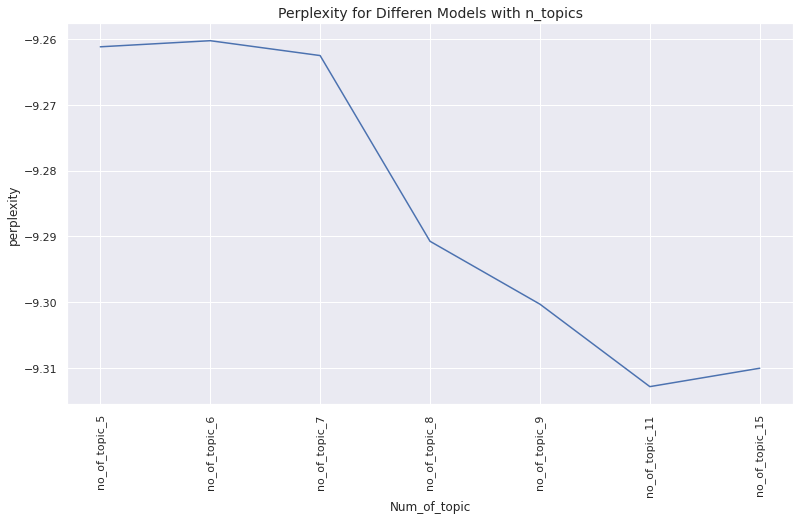

In [ ]:
fig, ax = plt.subplots(figsize = ( 13 , 7 ))
sns.lineplot(data=comparison_df['perplexity'])
ax.set_title( "Perplexity for Differen Models with n_topics" , size = 14 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('perplexity1.png')

Good model will have high topic coherence score and low perplexity, from above model with number of topics 9 holds the both property.

**Alpha(Document Topic Density):**

Similarly, the dirichlet distribution is a probability distribution as well - but it is not sampling from the space of real numbers. Instead it is sampling over a probability simplex.

Alpha is distribution it should ranges between 0 to 1.

Higher the alpha, document will have more number of topic distribution. Lower the alpha, document will last with very low number of topic.

In [ ]:
# paremetric range for alpha
alpha = [0.15, 0.35,0.5,0.6]

# store resulted coherence
coherence_dict_alpha = {}
perplexity_dict_alpha = {}

# loop through model
for i in alpha:
  lda = LdaModel(corpus=corpus,num_topics = 9, id2word = word_to_ID, chunksize=400, passes=20,random_state=100,alpha = i)
  
  # calculating coherence
  coherence_model_lda = CoherenceModel(model=lda, texts=corpus_df_2['article_content'], dictionary=word_to_ID, coherence='c_v',)
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_dict_alpha[i] = coherence_lda

  # calculating perplexity
  perplexity_ = lda.log_perplexity(corpus)

  perplexity_dict_alpha[i] = perplexity_

In [ ]:
# creating coherence df from dictionary
coherence_df_alpha = pd.DataFrame.from_dict(coherence_dict_alpha.items())

# creating perplexity df from the dictionary
perplexity_df_alpha = pd.DataFrame.from_dict(perplexity_dict_alpha.items())

In [ ]:
# set alpha value as index in both df
coherence_df_alpha.set_index(0,inplace=True)
perplexity_df_alpha.set_index(0,inplace=True)

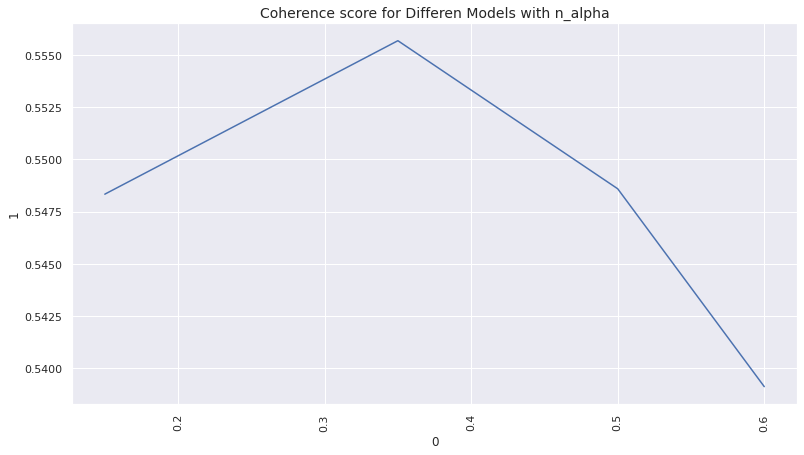

In [ ]:
fig, ax = plt.subplots(figsize = ( 13 , 7 ))
sns.lineplot(data=coherence_df_alpha[1])
ax.set_title( "Coherence score for Differen Models with n_alpha" , size = 14 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('coherence2.png')


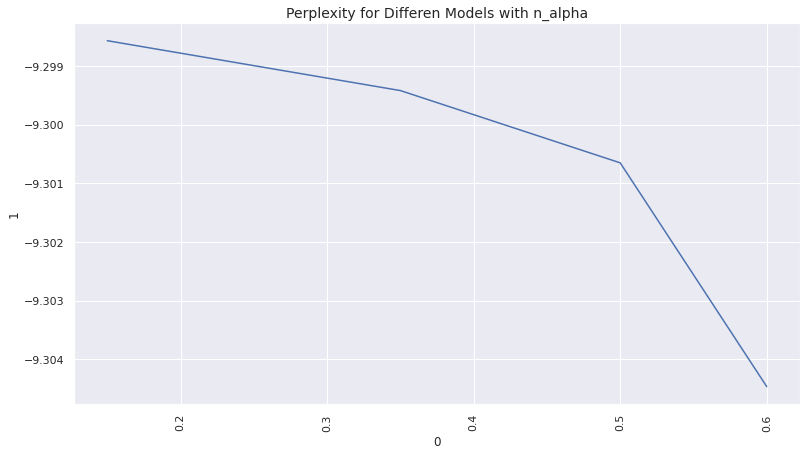

In [ ]:
fig, ax = plt.subplots(figsize = ( 13 , 7 ))
sns.lineplot(data=perplexity_df_alpha[1])
ax.set_title( "Perplexity for Differen Models with n_alpha" , size = 14 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('perplexity2.png')

From above for alpha value 0.35 we got relatively high coherence and low perplexity. So our optimal alpha parametre is 0.35. 

**Beta(Topic term Density):**

Higher the value Topic consist more words and lower the value topic consist of less words, which leads to more topic.

In [ ]:
# paremetric range for alpha
beta = [0.15, 0.35,0.5,0.6]

# store resulted coherence
coherence_dict_beta = {}
perplexity_dict_beta = {}

# loop through model
for i in beta:
  lda = LdaModel(corpus=corpus,num_topics = 9, id2word = word_to_ID, chunksize=400, passes=20,random_state=100,alpha = 0.35, eta=i)
  
  # calculating coherence
  coherence_model_lda = CoherenceModel(model=lda, texts=corpus_df_2['article_content'], dictionary=word_to_ID, coherence='c_v',)
  coherence_lda = coherence_model_lda.get_coherence()
  coherence_dict_beta[i] = coherence_lda

  # calculating perplexity
  perplexity_ = lda.log_perplexity(corpus)

  perplexity_dict_beta[i] = perplexity_

In [ ]:
coherence_df_beta = pd.DataFrame.from_dict(coherence_dict_beta.items())
perplexity_df_beta = pd.DataFrame.from_dict(perplexity_dict_beta.items())

In [ ]:
coherence_df_beta.set_index(0,inplace=True)
perplexity_df_beta.set_index(0,inplace=True)

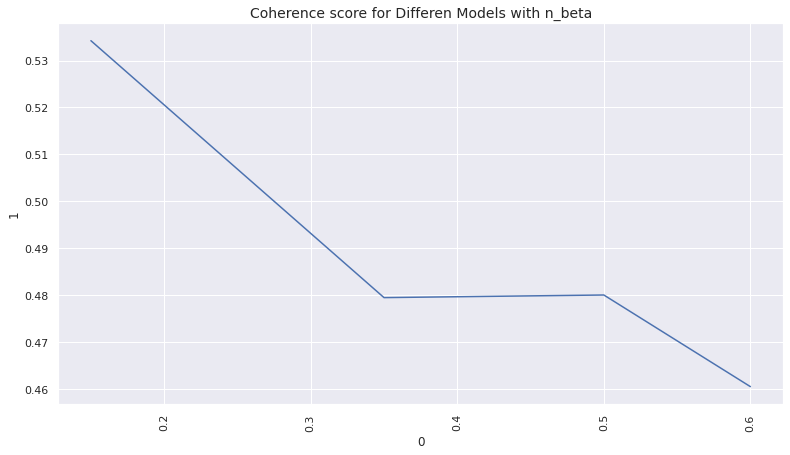

In [ ]:
fig, ax = plt.subplots(figsize = ( 13 , 7 ))
sns.lineplot(data=coherence_df_beta[1])
ax.set_title( "Coherence score for Differen Models with n_beta" , size = 14 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('coherenc3.png')

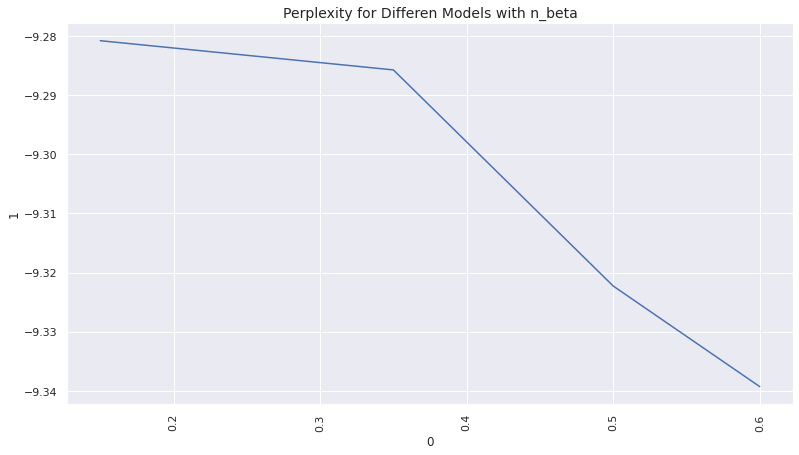

In [ ]:
fig, ax = plt.subplots(figsize = ( 13 , 7 ))
sns.lineplot(data=perplexity_df_beta[1])
ax.set_title( "Perplexity for Differen Models with n_beta" , size = 14 )
for item in ax.get_xticklabels():
    item.set_rotation(90)
fig.savefig('perplexity 3.png')

For beta 0.15 we got higher coherence and lower perplexity. Therefore our optimal beta value is 0.15.

**Tunned Parametres:**

---



Lets build the model with Tunned parametres obtained from the loop.

Number of Topics = 9

eta = 0.15

Alpha = 0.35

In [ ]:
# creating LD instance with optimal parametres
lda = LdaModel(corpus=corpus,num_topics = 9, id2word = word_to_ID, chunksize=400, passes=20,random_state=111,alpha=0.35,eta=0.15)

**Evaluation:**

In [ ]:
# calculating coherence
coherence_model_lda = CoherenceModel(model=lda, texts=corpus_df_2['article_content'], dictionary=word_to_ID, coherence='c_v',)
coherence_lda = coherence_model_lda.get_coherence()
print(f'optimal LDA model coherence score is {coherence_lda}')

# calculating perplexity
perplexity_ = lda.log_perplexity(corpus)
print(f'optimal LDA model coherence score is {perplexity_}')

optimal LDA model coherence score is 0.5369093943938036
optimal LDA model coherence score is -9.256424596265026


Compare to Tunned Parametres, model with base parametres extracts well in terms of coherence and perplexity score. Therefore Baseline model is our future model, lets go ahead with that.

**Future model:**

In [ ]:
# create instance for LDA
lda = LdaModel(corpus=corpus,num_topics = 10, id2word = word_to_ID, chunksize=400, passes=20,random_state=100,per_word_topics=True,alpha='symmetric',eta=None)

**Exploring Model Extraction:**

In [ ]:
def words_per_topic(num_of_words):
  '''
  function returns list of tuples, in tuples pair of topic number and topwords in topics along with weightage
  '''
  topics = lda.print_topics(num_words=num_of_words)
  for topic in topics:
    return topics

In [ ]:
# applying function
words_per_topic = words_per_topic(15)

In [ ]:
# break the tuple and returns texts along with weightage
words_topic_list = [tuples[1] for tuples in words_per_topic]

In [ ]:
# texts along with weightage
words_topic_list

['0.011*"year" + 0.008*"price" + 0.008*"market" + 0.008*"growth" + 0.008*"economy" + 0.007*"rate" + 0.007*"bank" + 0.006*"sale" + 0.006*"share" + 0.006*"economic" + 0.006*"rise" + 0.005*"figure" + 0.004*"dollar" + 0.004*"month" + 0.004*"oil"',
 '0.017*"wale" + 0.011*"england" + 0.007*"robinson" + 0.006*"nation" + 0.005*"ireland" + 0.005*"zealand" + 0.005*"williams" + 0.005*"six_nation" + 0.005*"france" + 0.004*"new_zealand" + 0.004*"welsh" + 0.004*"library" + 0.003*"coach" + 0.003*"six" + 0.003*"jones"',
 '0.010*"would" + 0.008*"people" + 0.006*"government" + 0.006*"say" + 0.005*"could" + 0.005*"year" + 0.005*"also" + 0.005*"new" + 0.004*"country" + 0.003*"one" + 0.003*"tax" + 0.003*"public" + 0.003*""the" + 0.003*"world" + 0.003*"plan"',
 '0.008*"game" + 0.007*"one" + 0.006*"year" + 0.006*"player" + 0.006*"time" + 0.005*"play" + 0.005*"first" + 0.004*"like" + 0.004*"get" + 0.004*"music" + 0.004*"new" + 0.004*"also" + 0.004*"two" + 0.004*"think" + 0.004*"win"',
 '0.007*"open" + 0.006*"

Model output contains, distribution of words in topic with weights.

In [ ]:
def topic_word_df(dist):

  '''
  function takes texts along with weightage and returns dataframe  of important texts
  '''

  #split the string with given delimiters
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-+|\*+|\"")
  d = tokenizer.tokenize(dist)

  # returns list of string not having given delimiter
  d = [x for x in d if x != '0']
  d = [x for x in d if x != '+']

  # returns dataframe with important words
  text = []
  final = ','
  for elem in d:
    text.append(elem[5:])
    string = final.join(text)
  return pd.DataFrame(string.split(','))


In [ ]:
# applying function
df = topic_word_df(words_topic_list[0])
df1 = topic_word_df(words_topic_list[1])
df2 = topic_word_df(words_topic_list[2])
df3 = topic_word_df(words_topic_list[3])
df4 = topic_word_df(words_topic_list[4])
df5 = topic_word_df(words_topic_list[5])
df6 = topic_word_df(words_topic_list[6])
df7 = topic_word_df(words_topic_list[7])
df8 = topic_word_df(words_topic_list[8])
df9 = topic_word_df(words_topic_list[9])


# rename the dataframe
df.rename(columns={0:'topic_0'},inplace=True)
df1.rename(columns={0:'topic_1'},inplace=True)
df2.rename(columns={0:'topic_2'},inplace=True)
df3.rename(columns={0:'topic_3'},inplace=True)
df4.rename(columns={0:'topic_4'},inplace=True)
df5.rename(columns={0:'topic_5'},inplace=True)
df6.rename(columns={0:'topic_6'},inplace=True)
df7.rename(columns={0:'topic_7'},inplace=True)
df8.rename(columns={0:'topic_8'},inplace=True)
df9.rename(columns={0:'topic_9'},inplace=True)

In [ ]:
# concatenate the individual dataframe
topics = pd.concat([df,df1,df2,df3,df4,df5,df6,df7,df8,df9],axis=1)

In [ ]:
# top 15 important words in each topic
topics.to_excel('out_put.xlsx')
topics

,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,"""year""","""wale""","""would""","""game""","""open""","""labour""","""club""","""game""","""people""","""firm"""
1,"""price""","""england""","""people""","""one""","""year""","""blair""","""side""","""film""","""technology""","""file"""
2,"""market""","""robinson""","""government""","""year""","""world""","""party""","""england""","""device""","""mobile""","""company"""
3,"""growth""","""nation""","""say""","""player""","""last""","""tory""","""game""","""microsoft""","""phone""","""legal"""
4,"""economy""","""ireland""","""could""","""time""","""first""","""would""","""minute""","""sony""","""service""","""site"""
5,"""rate""","""zealand""","""year""","""play""","""match""","""election""","""season""","""year""","""user""","""court"""
6,"""bank""","""williams""","""also""","""first""","""cup""","""lord""","""team""","""best""","""net""","""virus"""
7,"""sale""","""six_nation""","""new""","""like""","""race""","""minister""","""ireland""","""camera""","""digital""","""spam"""
8,"""share""","""france""","""country""","""get""","""roddick""","""howard""","""chelsea""","""award""","""computer""","""machine"""
9,"""economic""","""new_zealand""","""one""","""music""","""australian""","""rugby""","""second""","""also""","""use""","""dvd"""


**Topic Visualization:**

In [ ]:
# !pip install pyLDAvis

In [ ]:
import pyLDAvis.gensim_models

In [ ]:
pyLDAvis.enable_notebook()

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


pyLDAvis provides interactive plot in reduced dimensional space. 

In [ ]:
LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda, corpus,word_to_ID)
pyLDAvis.display(LDAvis_prepared)

From above plot, Topic 1,5 & 4 are cluttered in Second quadrant but topic 2 located in same quadrant but not intersected it implies those three topics sharing words between them. Topic 6 & 9 related to each other placed in First Quandrant. Topic 6, 4 & 2 are talks about similar topics but not sharing words between them.

In [ ]:
pyLDAvis.save_html(LDAvis_prepared, 'lda.html')

**Testing part:**

Pass the unseen document from individual article segment. Lets check what topic that our model assigned to the unseen documents. As we know category of article prehand, its effective to interpret model outcomes. 



**Topic Assignment for unseen documents:**

In [ ]:
# test article from business categories
bow_test_doc = word_to_ID.doc2bow(hold_out_1)

# topic assigned by model
alocated_topics_1 =  lda.get_document_topics(bow_test_doc)

In [ ]:
df_1 = pd.DataFrame(alocated_topics_1,columns=['topics','Business_test'])

This article is from business category, our model shows this article contains more about topic 2. Topic 2 talks about really talks more about business related topics. Similarly carried out remaining hold out samples.

In [ ]:
# test article from entertainment categories
bow_test_doc = word_to_ID.doc2bow(hold_out_2)

# topic assigned by model
alocated_topics_2 = lda.get_document_topics(bow_test_doc)

In [ ]:
df_2 = pd.DataFrame(alocated_topics_2,columns=['topics','Entertain_test'])

In [ ]:
# test article from politics categories
bow_test_doc = word_to_ID.doc2bow(hold_out_3)

# topic assigned by model
alocated_topics_3 = lda.get_document_topics(bow_test_doc)

In [ ]:
df_3 = pd.DataFrame(alocated_topics_3,columns=['topics','Politics_test'])

In [ ]:
# # test article from sport categories
bow_test_doc = word_to_ID.doc2bow(hold_out_4)

# topic assigned by model
alocated_topics_4 = lda.get_document_topics(bow_test_doc)

In [ ]:
df_4 = pd.DataFrame(alocated_topics_4,columns=['topics','Sport_test'])

In [ ]:
# # test article from technology categories 
bow_test_doc = word_to_ID.doc2bow(hold_out_5)

# topic assigned by model
alocated_topics_5 = lda.get_document_topics(bow_test_doc)

In [ ]:
df_5 = pd.DataFrame(alocated_topics_5,columns=['topics','Tech_test'])

In [ ]:
# concatenate the individual dataframe
topics_test = pd.concat([df_1,df_2,df_3,df_4,df_5],axis=1)
topics_test.to_excel('out_put2.xlsx')
topics_test

,topics,Business_test,topics,Entertain_test,topics,Politics_test,topics,Sport_test,topics,Tech_test
0,0,0.119044,0.0,0.017532,1.0,0.031560,1.0,0.010086,2.0,0.050526
1,1,0.011727,2.0,0.134359,2.0,0.446973,2.0,0.037317,3.0,0.033049
2,2,0.366179,3.0,0.303492,3.0,0.026837,3.0,0.417673,4.0,0.017453
3,3,0.067328,4.0,0.022966,5.0,0.315578,4.0,0.123996,7.0,0.178839
4,4,0.034188,5.0,0.034183,6.0,0.010554,6.0,0.397741,8.0,0.662374
5,5,0.054862,6.0,0.023237,8.0,0.090512,NaN,NaN,9.0,0.045860
6,6,0.034230,7.0,0.381473,9.0,0.072062,NaN,NaN,NaN,NaN
7,7,0.016889,8.0,0.024437,NaN,NaN,NaN,NaN,NaN,NaN
8,8,0.212472,9.0,0.054499,NaN,NaN,NaN,NaN,NaN,NaN
9,9,0.083081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


LDA works well and extract the exact theme from the unseen samples too. But to get proper model we have provide proper prior probabilities. 

Lets try Another algorithm

**Non-Negative Matrix Factorization (NMF):**

---




  NMF one of matrix factorization technique similar to SVD as seen beginning of the context. But NMF will consider only positive values in factors. This makes interpretibility of model well easier than SVD. 

  V ~ W * H

  Where, V = Document Term matrix (TFIDF Normalised matrix)

         w = Topic Term matrix

         H = Topic Document matrix
         
  NMF Tries different values for W and H, untill it gets stable. Unlike SVD, NMF has objective Function, its tries to minimize loss function to obtain approximate accurate of V. 


In [ ]:
corpus_df.head()

,article_content,Topics,length_article,after_rem_punc_length,after_rem_stop_length,after_rem_num,final_length
0,yukos unit buyer face loan claim owner embattl...,business,291,275,170,170,156
1,sale boost time warner profit quarterly profit...,business,489,447,280,267,241
2,dollar gain greenspan speech dollar hit highes...,business,428,396,245,244,213
3,trade gap hit record gap export import hit -ti...,business,375,345,225,213,187
4,high fuel price hit profit british airway blam...,business,463,426,294,278,242


In [ ]:
# import model 
from sklearn.decomposition import NMF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# take articles
corpus = corpus_df['article_content']

In [ ]:
# craeting TFIDF matrix with unigram
vectorizer = TfidfVectorizer(ngram_range=(1,1))
corpus_tri = vectorizer.fit_transform(corpus)

In [ ]:
tfidf_df_nmf = pd.DataFrame(corpus_tri.toarray(), 
                        columns=vectorizer.get_feature_names())
tfidf_df_nmf.head()

,00,000,000bn,000m,000s,000th,001,001and,001st,004,0051,01,0100,011,02,028,03,033,037,03bn,04,041,04bn,04m,04secs,05,050,0530,0530gmt,056,05bn,05m,06,060,069,06bn,07,070,072,08,...,zen,zenden,zenith,zephaniah,zephyr,zeppelin,zero,zeta,zhang,zhaoxing,zheng,zib,zidane,ziers,zillion,zimbabwe,zinc,zinedine,zip,ziyi,zodiac,zoe,zoellick,zogbia,zola,zomba,zombic,zombie,zone,zonealarm,zoom,zooropa,zornotza,zorro,zubair,zuluaga,zurich,zutons,zvonareva,zvyagintsev
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.022217,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.025318,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Considering 10 components as topics.

In [ ]:
# create an nmf instance with default values
n_components = 10
nmf = NMF(n_components=n_components, random_state=1)

In [ ]:
# fit the nmf model returns term topic matrix
doc_topic_matrix = nmf.fit(tfidf_df_nmf)

In [ ]:
# returns term topic matrix
term_topic_matrix = nmf.components_.T

In [ ]:
# creating term topic matrix
term_topic_matrix = pd.DataFrame(data=term_topic_matrix,index = vectorizer.get_feature_names(), columns=[f'Latent_concept_{i}' for i in range(0,10)])
term_topic_matrix.head()

,Latent_concept_0,Latent_concept_1,Latent_concept_2,Latent_concept_3,Latent_concept_4,Latent_concept_5,Latent_concept_6,Latent_concept_7,Latent_concept_8,Latent_concept_9
00,0.000000,0.000545,0.000700,0.000,0.000372,0.000183,0.000000,0.002401,0.002653,0.000694
000,0.016572,0.062058,0.052535,0.012,0.108401,0.021933,0.050780,0.085868,0.002996,0.010544
000bn,0.000000,0.000000,0.000000,0.000,0.001110,0.001023,0.000313,0.000000,0.000000,0.000021
000m,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.065093,0.023873
000s,0.000000,0.000000,0.000407,0.000,0.000000,0.000000,0.000920,0.000485,0.000000,0.000141


In [ ]:
term_topic_matrix.min()

Latent_concept_0    0.0
Latent_concept_1    0.0
Latent_concept_2    0.0
Latent_concept_3    0.0
Latent_concept_4    0.0
Latent_concept_5    0.0
Latent_concept_6    0.0
Latent_concept_7    0.0
Latent_concept_8    0.0
Latent_concept_9    0.0
dtype: float64

NMF returns only non-negative values.

In [ ]:
# returns document topic matrix
W = nmf.fit_transform(tfidf_df_nmf)

In [ ]:
W.shape

(2225, 10)

In [ ]:
# creating values from dataframe
Doc_topic_matrix = pd.DataFrame(data=W, columns=[f'Latent_concept_{i}' for i in range(0,10)])
Doc_topic_matrix.head()

,Latent_concept_0,Latent_concept_1,Latent_concept_2,Latent_concept_3,Latent_concept_4,Latent_concept_5,Latent_concept_6,Latent_concept_7,Latent_concept_8,Latent_concept_9
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.343029,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.009745,0.020107,0.087274,0.015241,0.037985,0.009724,0.000000,0.000000
2,0.001241,0.008599,0.000000,0.005072,0.178045,0.000000,0.004207,0.000000,0.001066,0.000779
3,0.000000,0.000000,0.000000,0.000000,0.183997,0.000552,0.000000,0.010288,0.000000,0.000000
4,0.002407,0.000000,0.002039,0.000427,0.133281,0.001489,0.001399,0.006868,0.001040,0.016712


**Topic Distribution cross Documents:**

In [ ]:
keys =  get_keys(Doc_topic_matrix.values)

In [ ]:
from collections import Counter

In [ ]:
# create dictionary, key as topic index and value as recurrence of topic over the corpus
count_pairs = Counter(keys).items()

# from dictionar extract key(topic index) and store in list
categories = [pair[0] for pair in count_pairs]

# from dictionary extract value(topic distribution) and store in list
counts = [pair[1] for pair in count_pairs]

# create dataframe of two columns categories and counts
dict_ = {'categories':categories, 'counts':counts}
data = pd.DataFrame.from_dict(dict_)

# sort by descending order
topic_counts = data.sort_values(by='counts',ascending=False)

In [ ]:
topic_counts.head()

,categories,counts
1,4,371
7,9,367
5,1,356
2,6,225
3,3,204


**Topic distribution among corpus:**

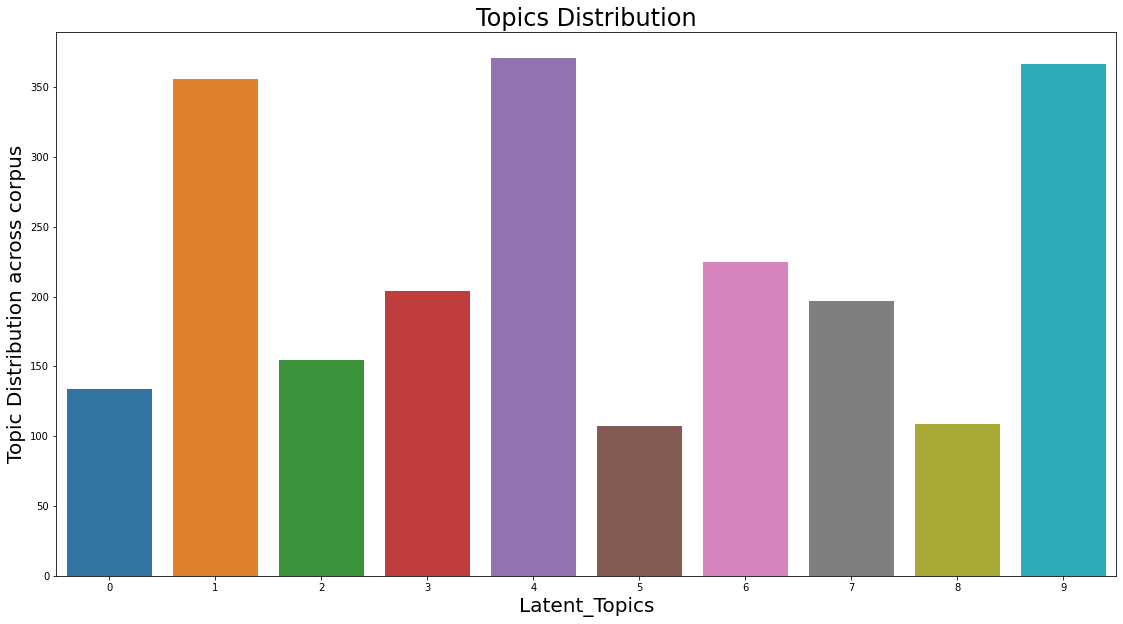

In [ ]:
fig, ax = plt.subplots(figsize = ( 19 , 10 ))
sns.barplot(x="categories", y="counts", data=topic_counts)
ax.set_xlabel( "Latent_Topics" , size = 20 )
ax.set_ylabel('Topic Distribution across corpus',fontsize=20);
ax.set_title( "Topics Distribution" , size = 24 )
fig.savefig('NMF Topic distlot.png')

**Term Distribution topicwise:**

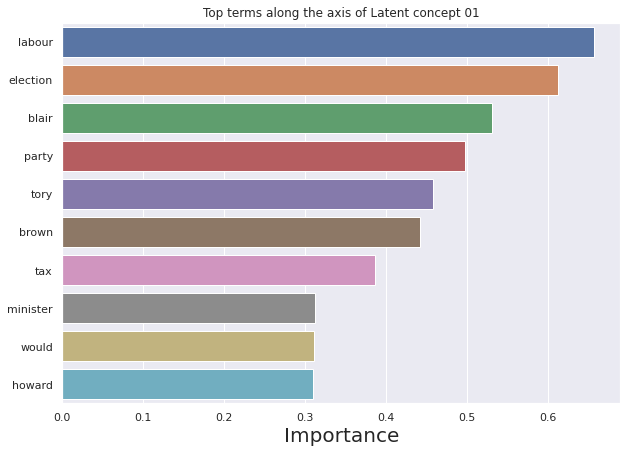

In [ ]:
# slicing topic 1 from dataframe
data = term_topic_matrix['Latent_concept_1']

# sort by descending manner
data = data.sort_values(ascending=False)

# slice top 10 words
top_10 = data[:10]


# plot top 10 words
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
fig = sns.barplot(x= top_10.values, y=top_10.index)
ax.set_xlabel( "Importance" , size = 20 )
ax.set_title('Top terms along the axis of Latent concept 01')
ax.figure.savefig('Latent_concept_01_NMF.png')

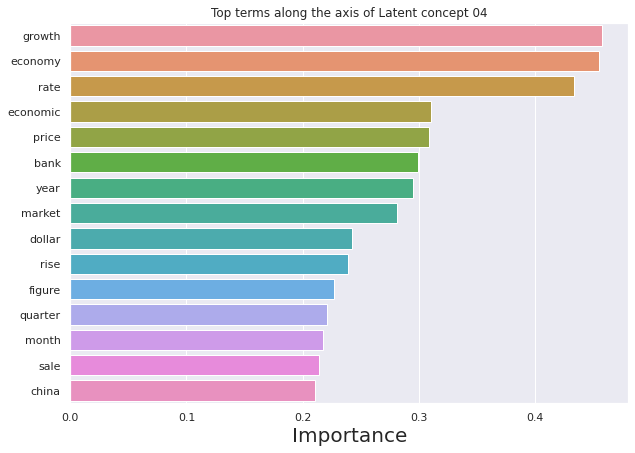

In [ ]:
data = term_topic_matrix['Latent_concept_4']
data = data.sort_values(ascending=False)
top_10 = data[:15]
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
fig = sns.barplot(x= top_10.values, y=top_10.index)
ax.set_xlabel( "Importance" , size = 20 )
ax.set_title('Top terms along the axis of Latent concept 04')
ax.figure.savefig('Latent_concept_04_NMF.png')

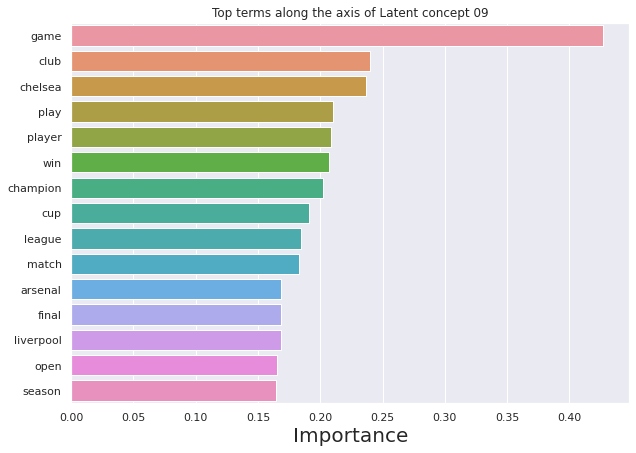

In [ ]:
data = term_topic_matrix['Latent_concept_9']
data = data.sort_values(ascending=False)
top_10 = data[:15]
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
fig = sns.barplot(x= top_10.values, y=top_10.index)
ax.set_xlabel( "Importance" , size = 20 )
ax.set_title('Top terms along the axis of Latent concept 09')
ax.figure.savefig('Latent_concept_09_NMF.png')

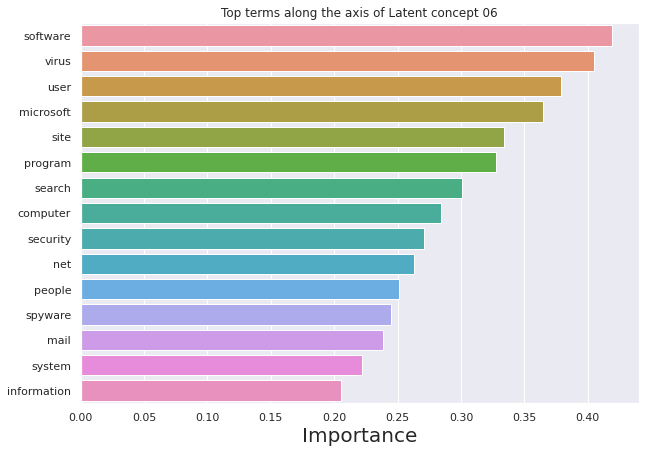

In [ ]:
data = term_topic_matrix['Latent_concept_6']
data = data.sort_values(ascending=False)
top_10 = data[:15]
fig, ax = plt.subplots(figsize = ( 10 , 7 ))
fig = sns.barplot(x= top_10.values, y=top_10.index)
ax.set_xlabel( "Importance" , size = 20 )
ax.set_title('Top terms along the axis of Latent concept 06')
ax.figure.savefig('Latent_concept_06_NMF.png')

In [ ]:
def top_n_words_in_topic(doc,n):

  '''
  function returns top n words in each topics
  '''
  # slice the require topic from term topic matrix
  corp = term_topic_matrix[doc]

  # sort by decsending manner
  top_words = corp.sort_values(ascending=False)[:n].to_dict().keys()

  # return dictionary 
  return f'{doc} important words are {top_words}'


In [ ]:
top_words = 3
top_3_words = []
for topics in term_topic_matrix.columns.tolist():
  top_3_words.append(top_n_words_in_topic(topics,top_words))
top_3_word_dictionary  = {}
for index,lists in enumerate(top_3_words):
  value = lists[47:-1]
  top_3_word_dictionary[index] = value

In [ ]:
top_3_word_dictionary

{0: "['england', 'wale', 'ireland']",
 1: "['labour', 'election', 'blair']",
 2: "['mobile', 'phone', 'technology']",
 3: "['film', 'award', 'best']",
 4: "['growth', 'economy', 'rate']",
 5: "['yukos', 'russian', 'oil']",
 6: "['software', 'virus', 'user']",
 7: "['music', 'band', 'chart']",
 8: "['kenteris', 'thanou', 'iaaf']",
 9: "['game', 'club', 'chelsea']"}

**Dominant Topics:**

In [ ]:
dominant_topic = np.argmax(Doc_topic_matrix.values,axis=1)

**Dimensionality Reduction using tSNE:**

In [ ]:
# reducing dimensional using tSNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,random_state=143,perplexity=40,n_iter=5000)
X_tsne = tsne.fit_transform(Doc_topic_matrix)

In [ ]:
# comparing dimensions
Doc_topic_matrix.shape, X_tsne.shape

((2225, 10), (2225, 2))

In [ ]:
# creating dataframe from arrays
x_tsne_df = pd.DataFrame(X_tsne,columns=['pc1','pc2'])

# assigning dominants topics to the document
x_tsne_df['dominant_topic'] = dominant_topic
x_tsne_df.head()

,pc1,pc2,dominant_topic
0,-5.991807,-24.145582,5
1,15.133477,-23.868200,4
2,15.333647,-44.884731,4
3,16.774984,-45.617275,4
4,14.657345,-36.884056,4


**Cluestering Similar Documents:**

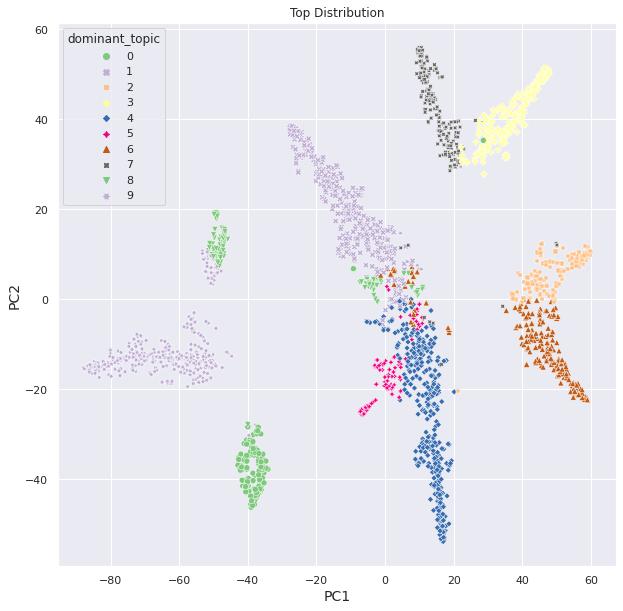

In [ ]:
fig,ax = plt.subplots(figsize=(10,10))
sns.scatterplot(x = 'pc1',y='pc2',hue='dominant_topic',data=x_tsne_df,style='dominant_topic',palette='Accent')
ax.set_xlabel( "PC1" , size = 14 )
ax.set_ylabel( "PC2" , size = 14 )
ax.set_title('Top Distribution')
ax.figure.savefig('tSNE Plot_NMF')

**Summary:**

 

  

*   Modelling starts by aggregating individual csv files, and stored in dataframe. Then explored the distribution of words among different categories. Essential preprocesing steps applied over raw data, it ease model to extract topics.
*   Then clean data load to different models. Started with **LSA(Latent sementic analysis)**. LSA extracts topic well but it comes under computationally ineffective due to inherent handling of sparse matrix. And there is no proper metric available to evaluate the model.

*   Then we decides to use Generative model **LDA(Latent Dirichlet Allocation)**. There we defined our base model with Topic coherence score of 58%, Over that we tunned three hyperpaarameters, then we obtained optimal values of alpha, beta and number topics. Using those values we build final LDA model and visualize through pyLDAvis.
*    Finally we used another factorizing algorithm **NMF(Non-negative matrix Factorization)** and vizualize the topics extracted from the model.





 



**Conclusion:**

Based on 

*   Interactive Visualization pyLDAvis.
*   Coherence and Perplexity Score.

*   Extracting Topics from Unseen Articles.

Latent Dirichlet Allocation(LDA) is final model to our topic extraction with 09 Topics and Alpha = "Symmetric".  


**Topics extracted by LDA Model:**



*   Topic 1 talks about Prime Minister of Canada Mr. Blair announcement.

*   Topic 2 & 6 Sports especially on Cricket world cup on wales.


*   Topic 3 International Business Economy.

*   Topic 4 (Entertainment) majorly on 2007 Academy award nominees and Winners.



*   Topic 5 & 7 describes Tech business.






*   Topic 8 solely talks about Konstantinos Kenteris (Greek Former Athlete).


*   Topic 9 talks about Bankruptcy of Russian oil Company Yukos.







**Thank You..!**